
**Dataset Description:**
The dataset contains information related to credit applications or loan approval. It consists of 25,134 entries (individual applicants) and 20 columns (features). Here's a breakdown of the columns and their meanings:

1. **Unnamed: 0:** An index or identifier for the rows.

2. **ID:** A unique identifier for each individual applicant.

3. **GENDER:** The gender of the applicant (e.g., 'M' for male, 'F' for female).

4. **CAR:** Whether the applicant owns a car ('Y' for yes, 'N' for no).

5. **REALITY:** Whether the applicant owns real estate ('Y' for yes, 'N' for no).

6. **NO_OF_CHILD:** The number of children the applicant has.

7. **INCOME:** The income of the applicant.

8. **INCOME_TYPE:** The type of income source (e.g., 'Working', 'Commercial associate', etc.).

9. **EDUCATION_TYPE:** The type of education the applicant has (e.g., 'Secondary / secondary special').

10. **FAMILY_TYPE:** The type of family the applicant belongs to (e.g., 'Married', 'Single / not married').

11. **HOUSE_TYPE:** The type of housing the applicant lives in (e.g., 'House / apartment').

12. **FLAG_MOBIL:** A binary flag indicating if the applicant has a mobile phone (1 for yes, 0 for no).

13. **WORK_PHONE:** A binary flag indicating if the applicant has a work phone (1 for yes, 0 for no).

14. **PHONE:** A binary flag indicating if the applicant has a phone (1 for yes, 0 for no).

15. **E_MAIL:** A binary flag indicating if the applicant has an email (1 for yes, 0 for no).

16. **FAMILY_SIZE:** The size of the applicant's family.

17. **BEGIN_MONTH:** The month when the applicant started the loan application process.

18. **AGE:** The age of the applicant.

19. **YEARS_EMPLOYED:** The number of years the applicant has been employed.

20. **TARGET:** The target variable indicating loan approval status (0 for approved, 1 for not approved).

**Data Types:**
- The dataset includes features of different data types:
  - Object data type (e.g., GENDER, CAR, INCOME_TYPE) represents categorical variables.
  - Float64 data type (e.g., INCOME, FAMILY_SIZE) represents numerical variables with decimal values.
  - Int64 data type (e.g., ID, NO_OF_CHILD, BEGIN_MONTH) represents integer variables.

**Summary:**
This dataset appears to be suitable for building models to predict loan approval based on various applicant attributes. It includes information such as personal characteristics (gender, age), financial status (income, assets), employment details (years employed), and family-related information (family size, marital status). The target variable "TARGET" indicates whether an applicant's loan was approved or not.

**Approach:**
1.	Data Exploration, Comprehension, and Visualization
2.	Data Preprocessing for Model Development
3.	Constructing the Model
4.	Assessing Model Performance


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries\
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

#Data collection

In [ ]:
df = pd.read_csv('credit_dataset.csv')
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [ ]:
print(df.isnull().sum().max())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-nul

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

# Data Exploration

In [ ]:
# Display basic statistical summary of numerical columns
numerical_summary = df.describe()
print(numerical_summary)


         Unnamed: 0            ID   NO_OF_CHILD        INCOME  FLAG_MOBIL  \
count  25134.000000  2.513400e+04  25134.000000  2.513400e+04     25134.0   
mean   12566.500000  5.078838e+06      0.512334  1.948339e+05         1.0   
std     7255.705169  4.194102e+04      0.787785  1.045110e+05         0.0   
min        0.000000  5.008806e+06      0.000000  2.700000e+04         1.0   
25%     6283.250000  5.042228e+06      0.000000  1.350000e+05         1.0   
50%    12566.500000  5.079004e+06      0.000000  1.800000e+05         1.0   
75%    18849.750000  5.115604e+06      1.000000  2.250000e+05         1.0   
max    25133.000000  5.150487e+06     19.000000  1.575000e+06         1.0   

         WORK_PHONE         PHONE        E_MAIL   FAMILY SIZE   BEGIN_MONTH  \
count  25134.000000  25134.000000  25134.000000  25134.000000  25134.000000   
mean       0.273812      0.292791      0.100660      2.294064     26.120594   
std        0.445923      0.455052      0.300885      0.947590     16.

In [ ]:
# Display value counts for categorical columns
categorical_columns = ['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']
for col in categorical_columns:
    print(df[col].value_counts())


F    15630
M     9504
Name: GENDER, dtype: int64
N    14618
Y    10516
Name: CAR, dtype: int64
Y    16461
N     8673
Name: REALITY, dtype: int64
Working                 15622
Commercial associate     7052
State servant            2437
Pensioner                  13
Student                    10
Name: INCOME_TYPE, dtype: int64
Secondary / secondary special    16808
Higher education                  7132
Incomplete higher                  993
Lower secondary                    187
Academic degree                     14
Name: EDUCATION_TYPE, dtype: int64
Married                 17509
Single / not married     3445
Civil marriage           2133
Separated                1467
Widow                     580
Name: FAMILY_TYPE, dtype: int64
House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: HOUSE_TYPE, dtype: int64


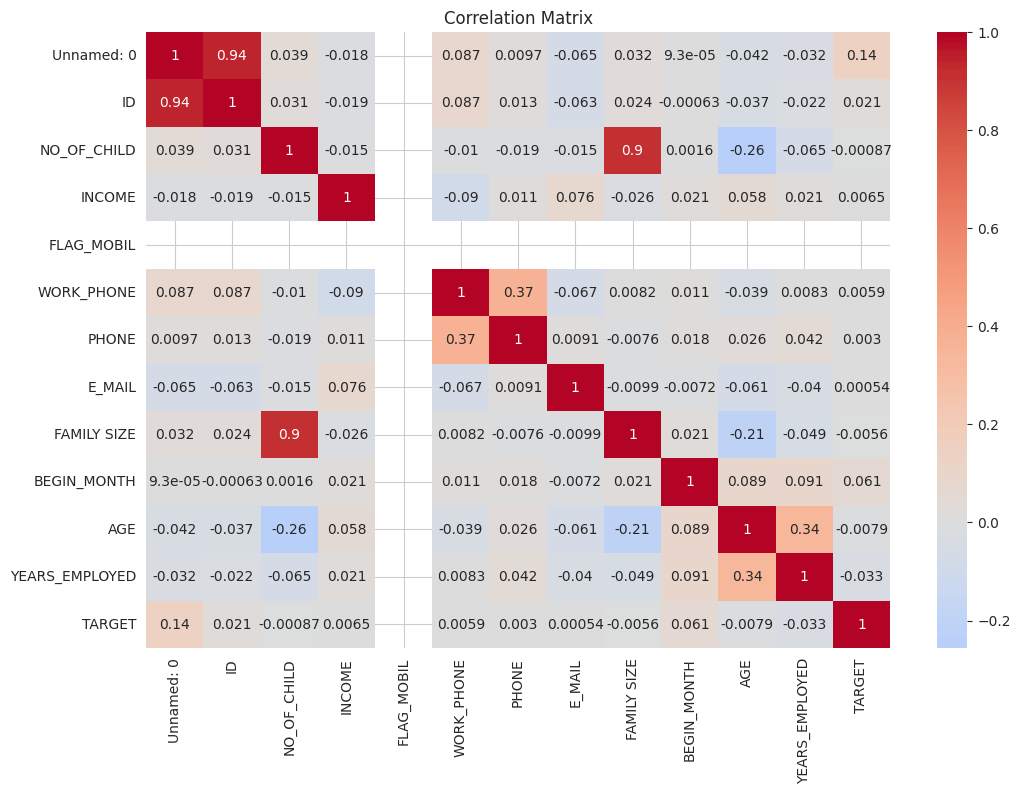

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


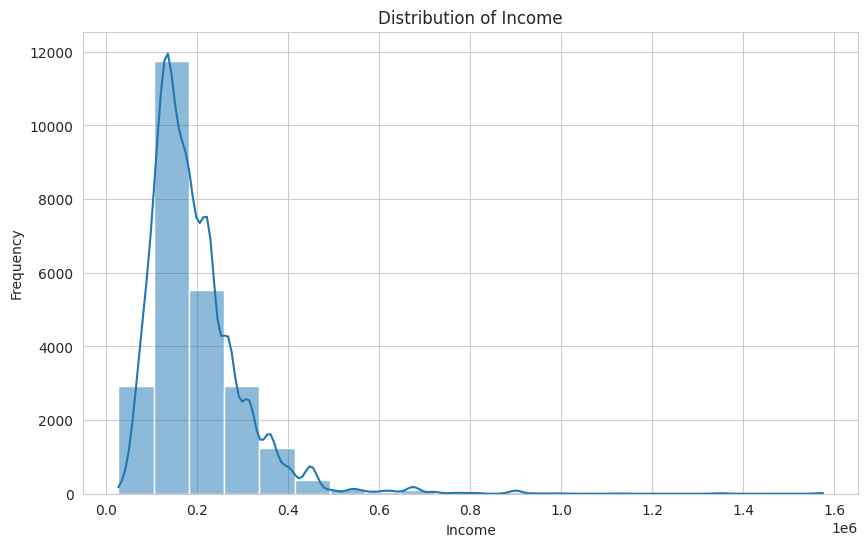

In [ ]:
# Plot distribution of selected features
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='INCOME', bins=20, kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


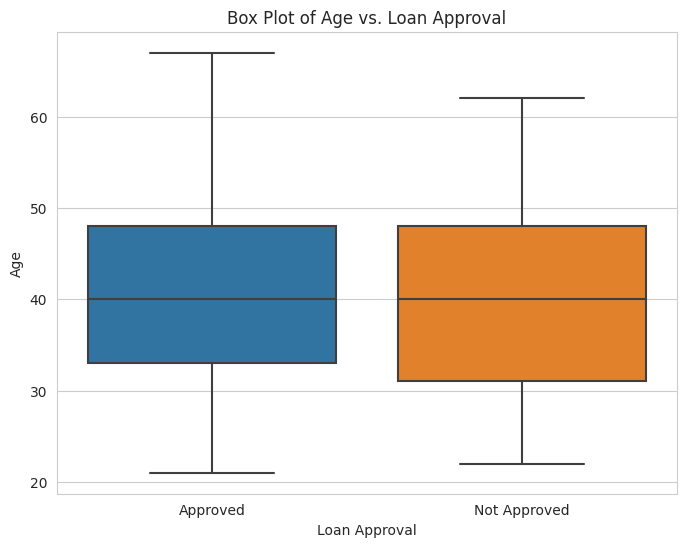

In [ ]:
# Box plot of age grouped by loan approval status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TARGET', y='AGE')
plt.title("Box Plot of Age vs. Loan Approval")
plt.xlabel("Loan Approval")
plt.ylabel("Age")
plt.xticks([0, 1], ['Approved', 'Not Approved'])
plt.show()


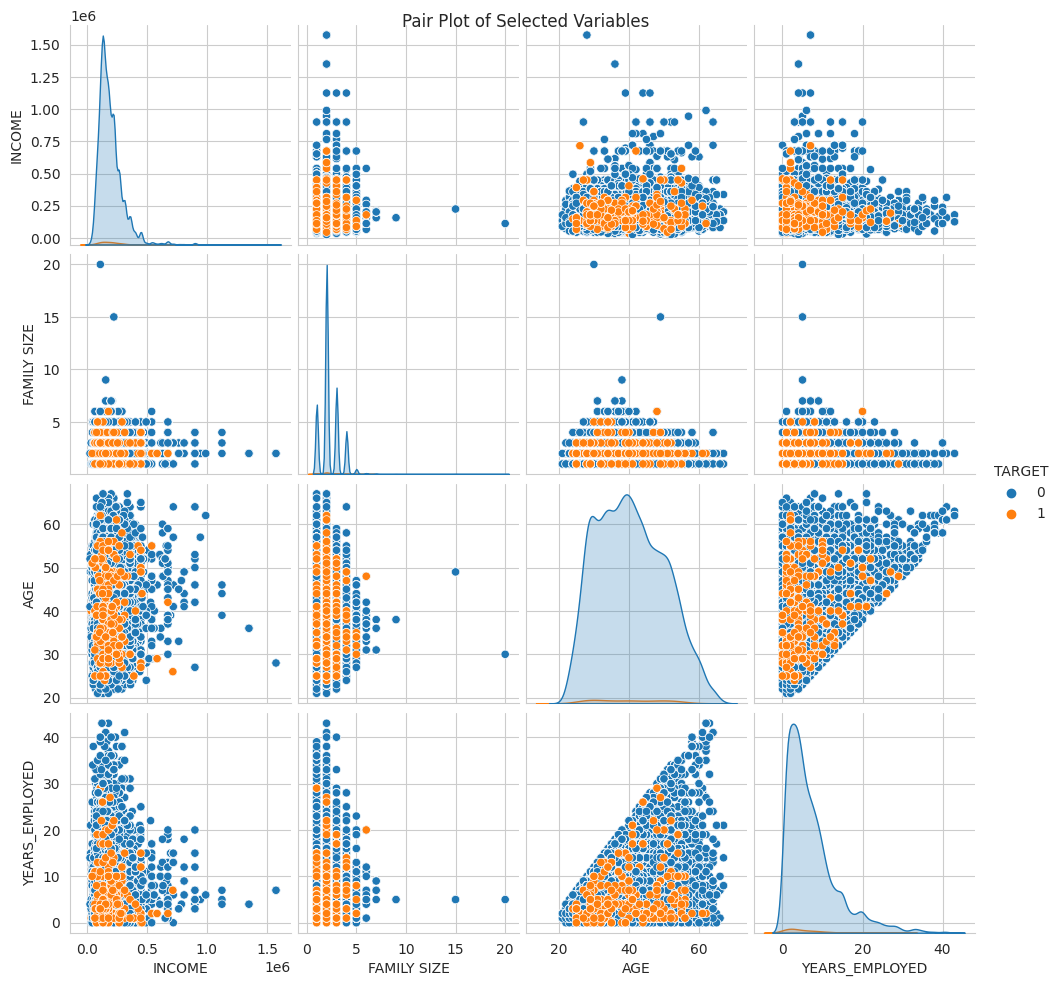

In [ ]:
# Create a pair plot to visualize relationships between numerical variables
sns.pairplot(df[['INCOME', 'FAMILY SIZE', 'AGE', 'YEARS_EMPLOYED', 'TARGET']], hue='TARGET', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Variables")
plt.show()


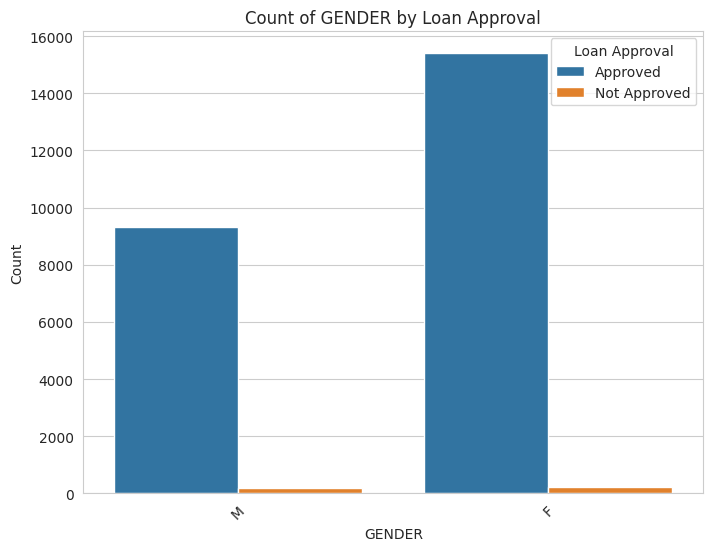

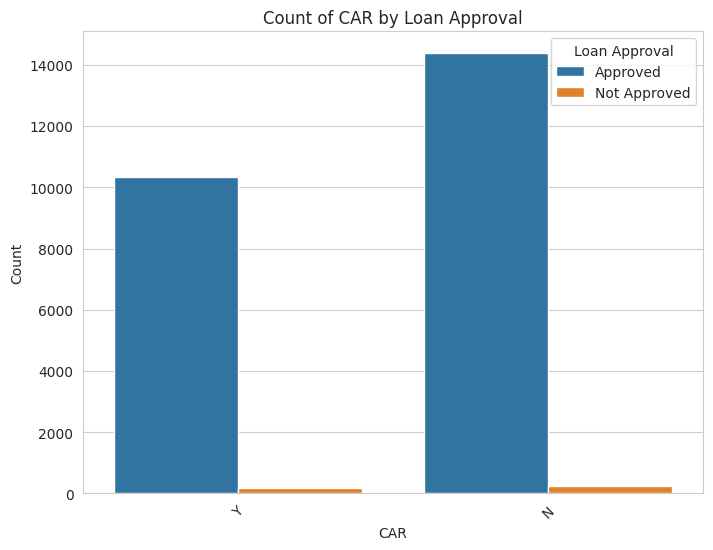

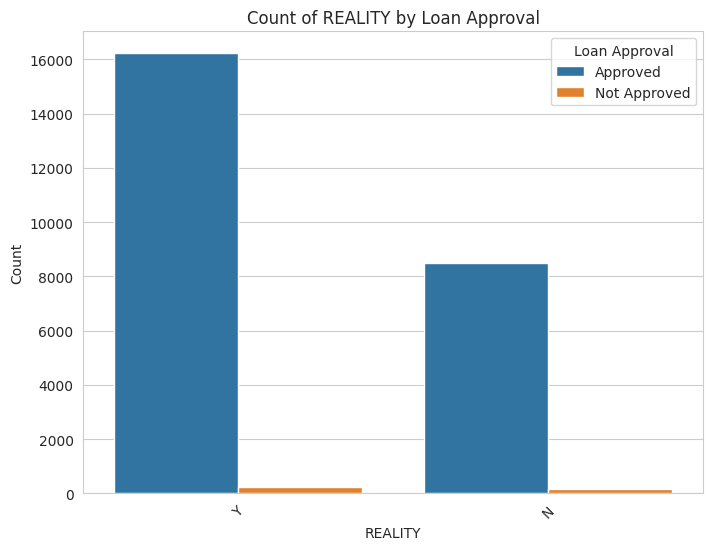

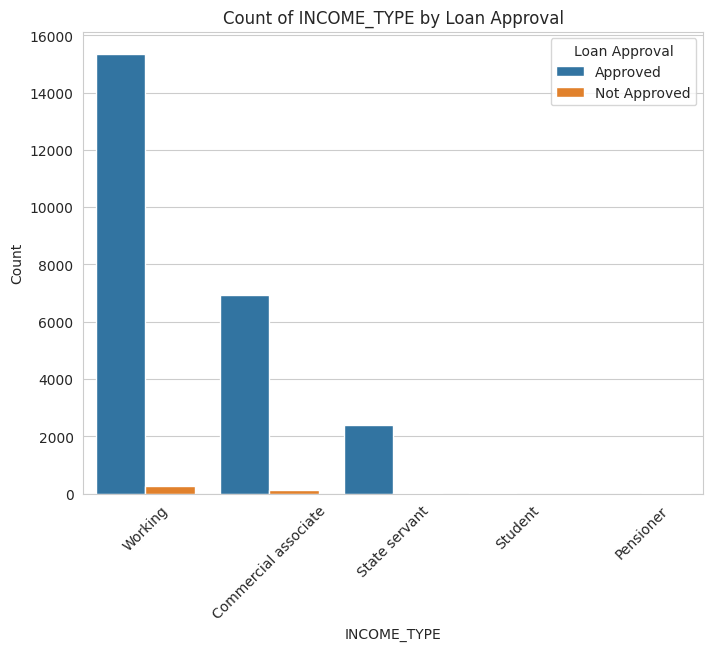

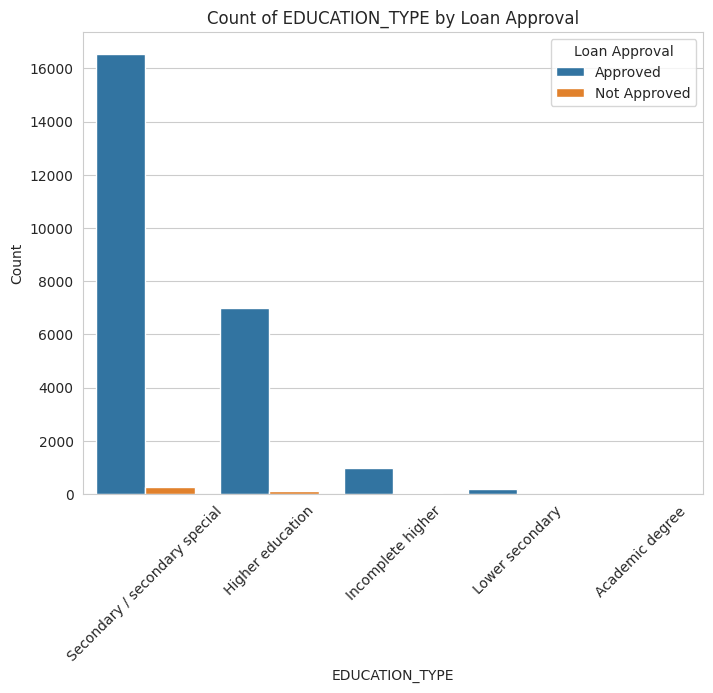

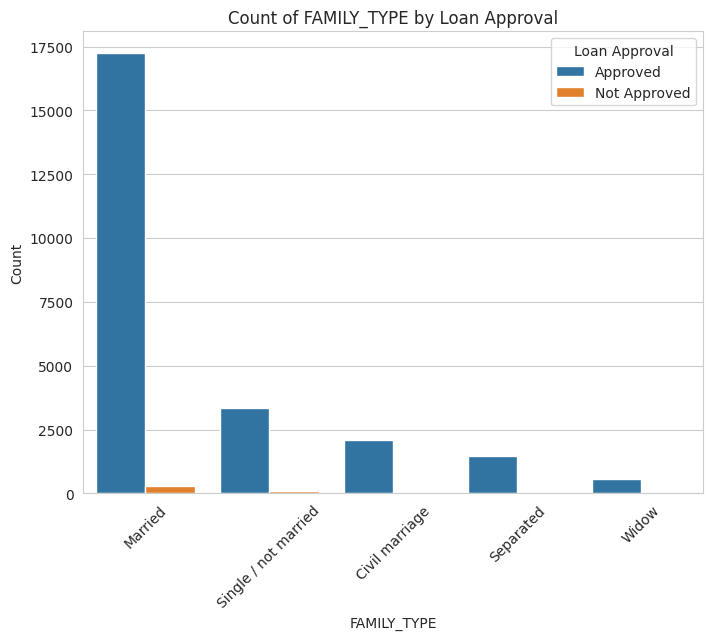

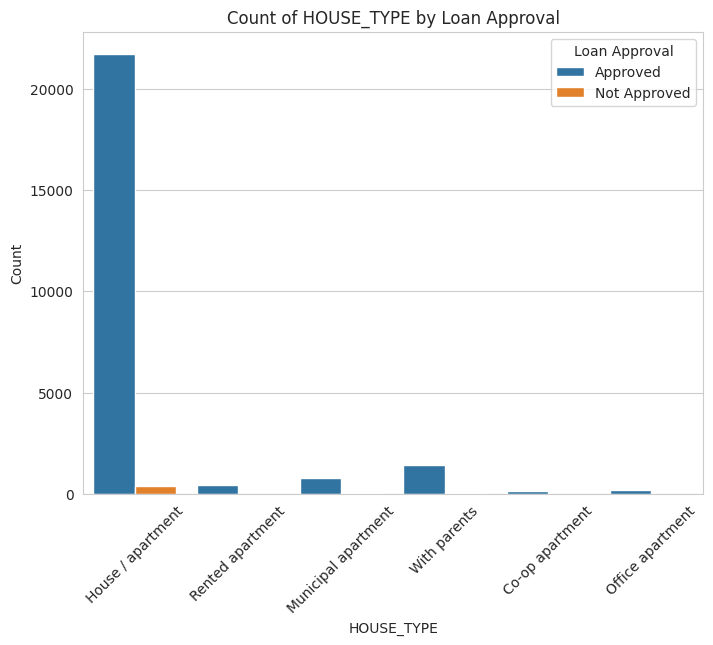

In [ ]:
# Plot bar plots for selected categorical columns
categorical_columns = ['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='TARGET')
    plt.title(f"Count of {col} by Loan Approval")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Loan Approval', labels=['Approved', 'Not Approved'])
    plt.show()


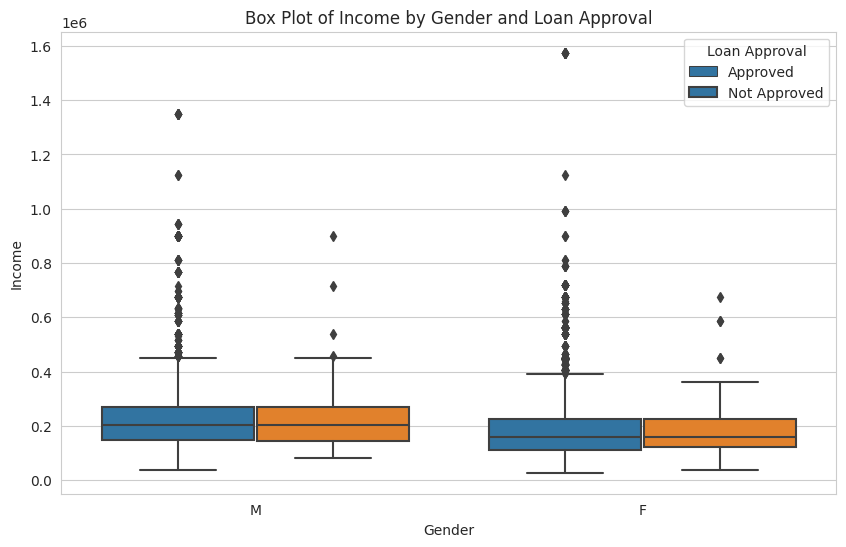

In [ ]:
# Box plot of income grouped by gender and loan approval status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GENDER', y='INCOME', hue='TARGET')
plt.title("Box Plot of Income by Gender and Loan Approval")
plt.xlabel("Gender")
plt.ylabel("Income")
plt.legend(title='Loan Approval', labels=['Approved', 'Not Approved'])
plt.show()


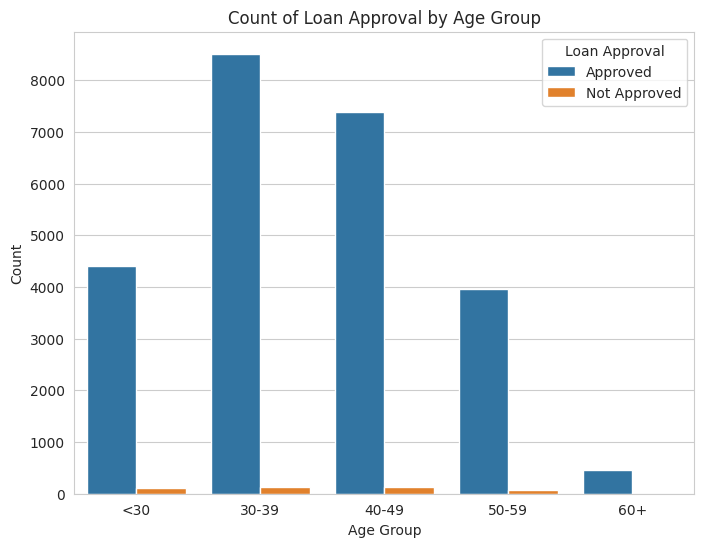

In [ ]:
# Create age groups and plot distribution
bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-39', '40-49', '50-59', '60+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=age_labels)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='AGE_GROUP', hue='TARGET')
plt.title("Count of Loan Approval by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Loan Approval', labels=['Approved', 'Not Approved'])
plt.show()


#Data Processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



# List of categorical features that need one-hot encoding
categorical_features = ['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']

# Print the columns before one-hot encoding
print("Columns before one-hot encoding:")
print(df.columns)

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Print the columns after one-hot encoding
print("\nColumns after one-hot encoding:")
print(df_encoded.columns)


Columns before one-hot encoding:
Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

Columns after one-hot encoding:
Index(['Unnamed: 0', 'ID', 'NO_OF_CHILD', 'INCOME', 'FLAG_MOBIL', 'WORK_PHONE',
       'PHONE', 'E_MAIL', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE',
       'YEARS_EMPLOYED', 'TARGET', 'GENDER_M', 'CAR_Y', 'REALITY_Y',
       'INCOME_TYPE_Pensioner', 'INCOME_TYPE_State servant',
       'INCOME_TYPE_Student', 'INCOME_TYPE_Working',
       'EDUCATION_TYPE_Higher education', 'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'FAMILY_TYPE_Married',
       'FAMILY_TYPE_Separated', 'FAMILY_TYPE_Single / not married',
       'FAMILY_TYPE_Widow', 'HOUSE_TYPE_House

# Data exploration after data processing

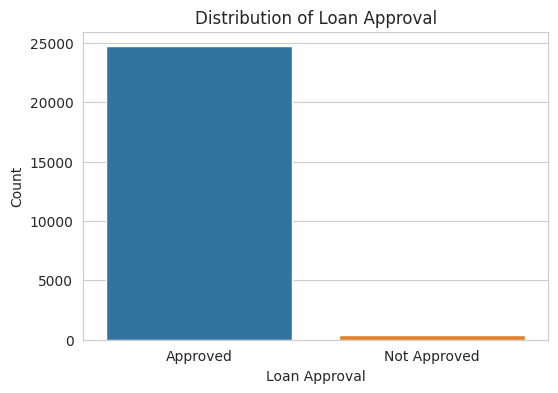

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df_encoded, x='TARGET')
plt.title("Distribution of Loan Approval")
plt.xlabel("Loan Approval")
plt.ylabel("Count")
plt.xticks([0, 1], ['Approved', 'Not Approved'])
plt.show()


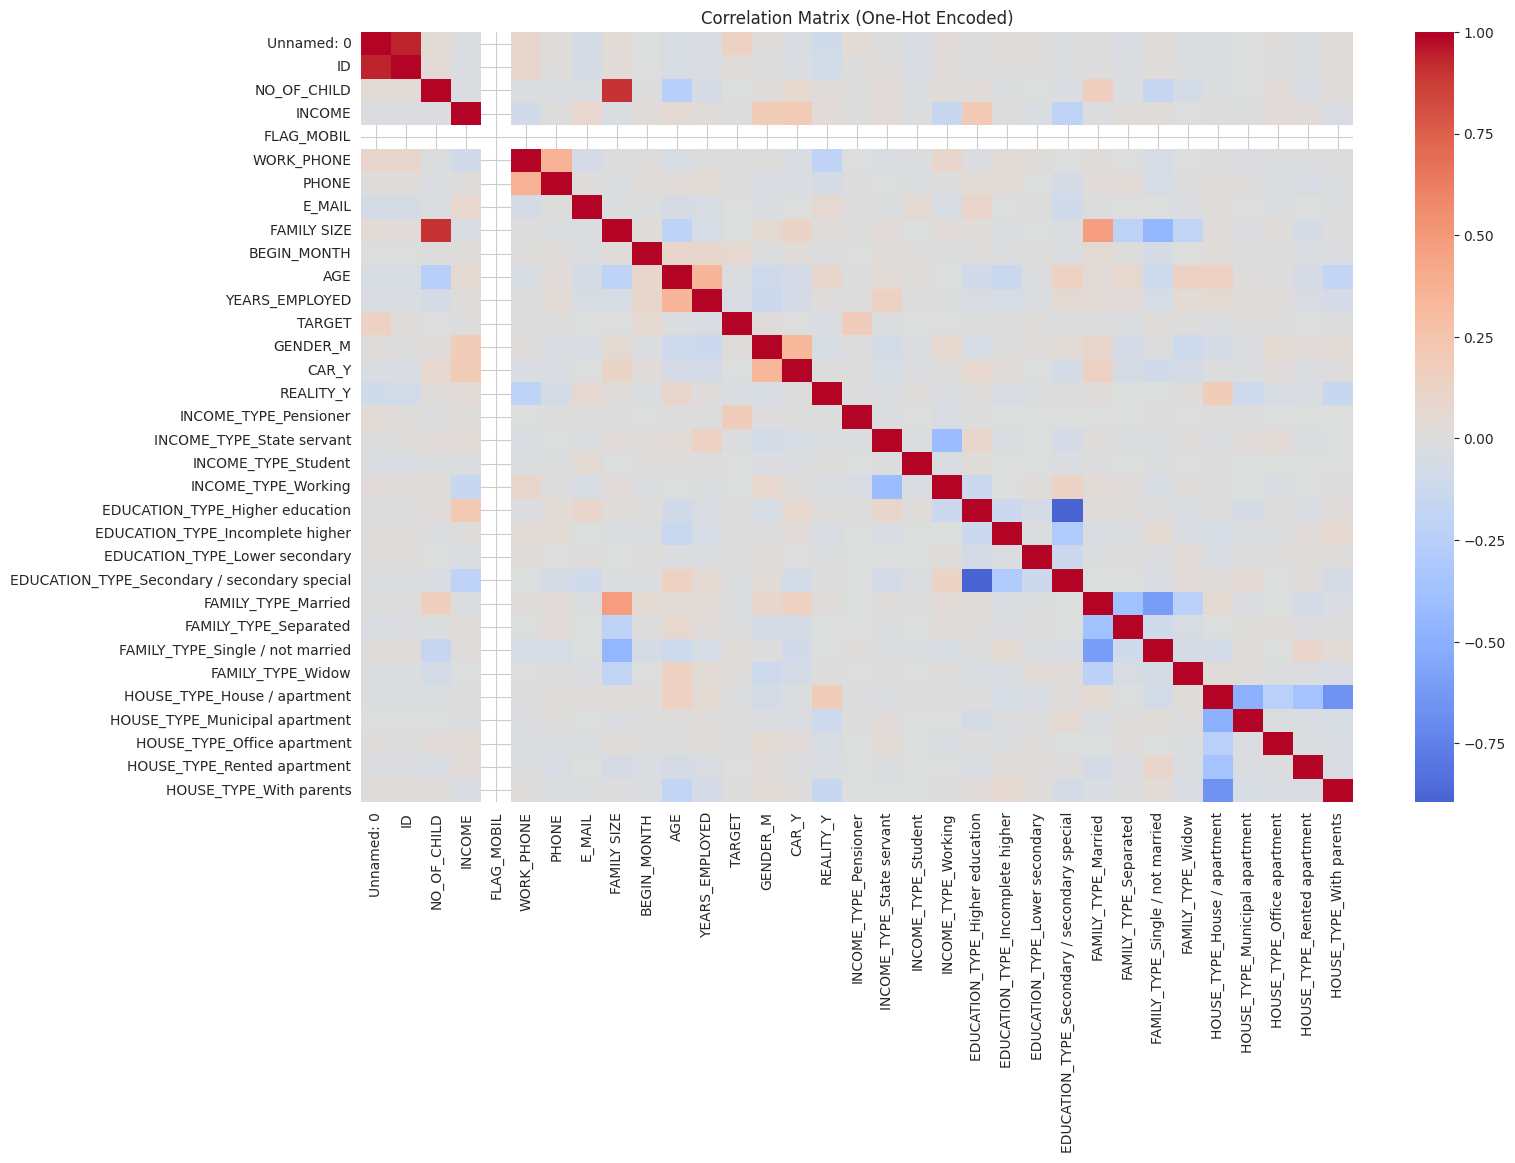

In [ ]:
# Calculate the correlation matrix
correlation_matrix_encoded = df_encoded.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix_encoded, cmap='coolwarm', center=0)
plt.title("Correlation Matrix (One-Hot Encoded)")
plt.show()


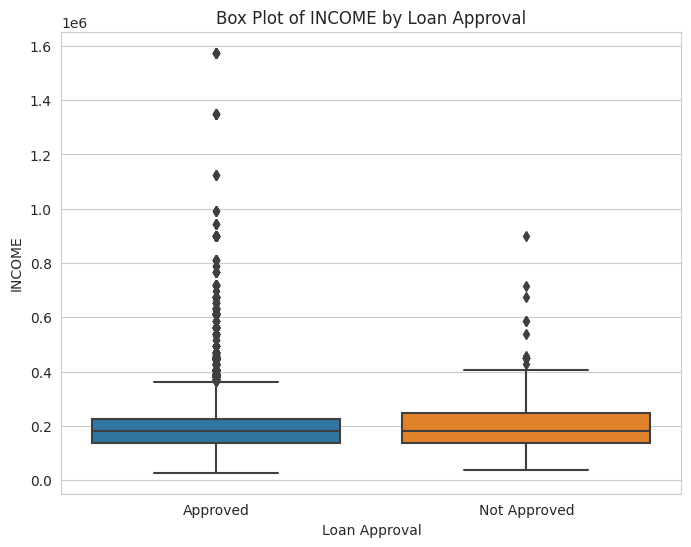

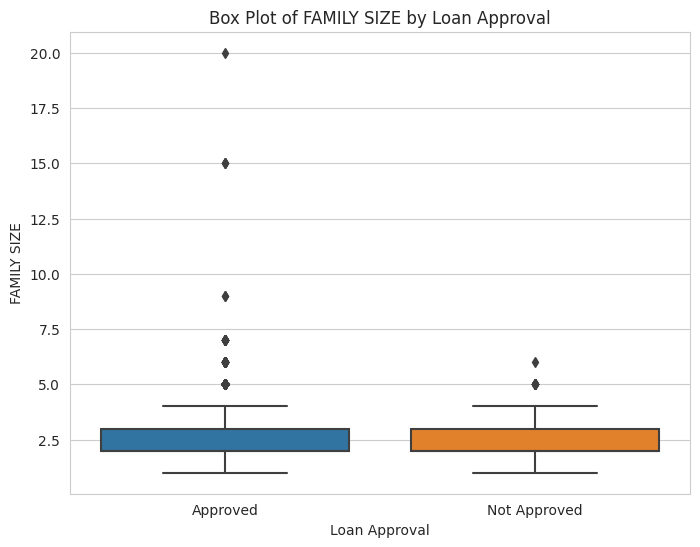

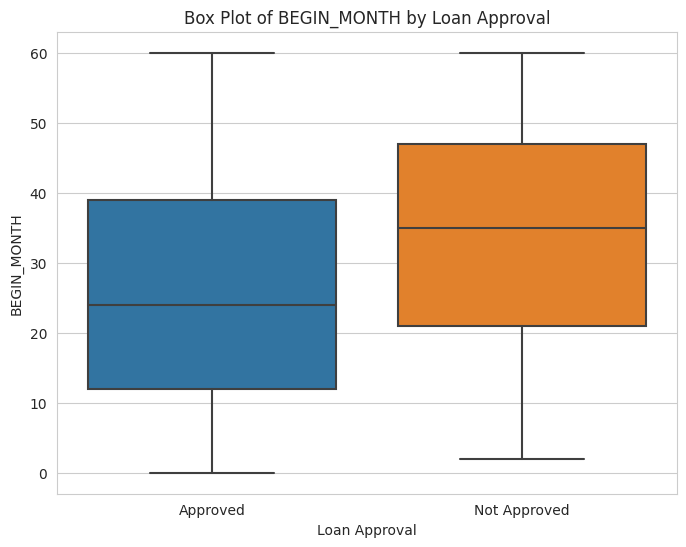

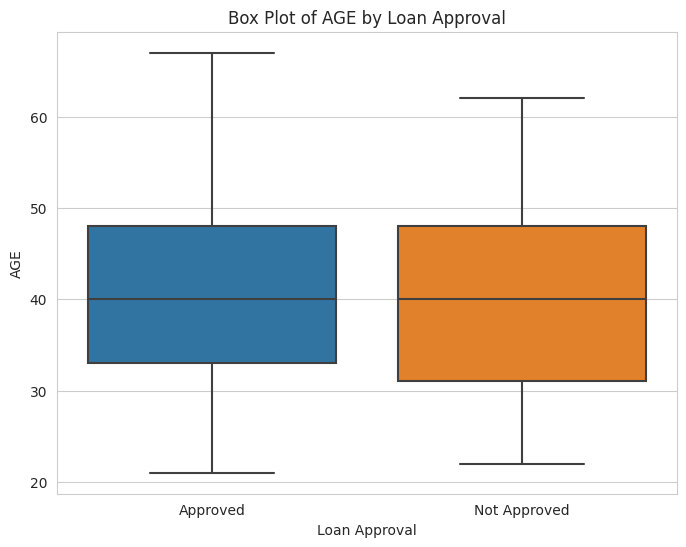

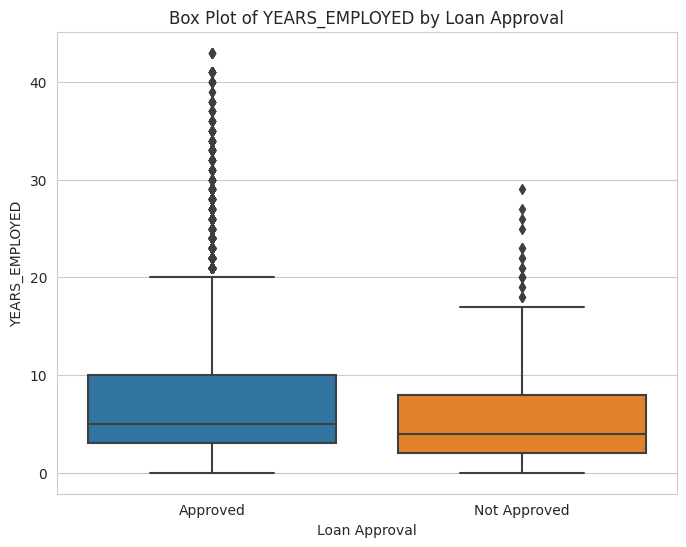

In [ ]:
# Plot box plots for selected continuous features by loan approval status
continuous_columns = ['INCOME', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED']
for col in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_encoded, x='TARGET', y=col)
    plt.title(f"Box Plot of {col} by Loan Approval")
    plt.xlabel("Loan Approval")
    plt.ylabel(col)
    plt.xticks([0, 1], ['Approved', 'Not Approved'])
    plt.show()


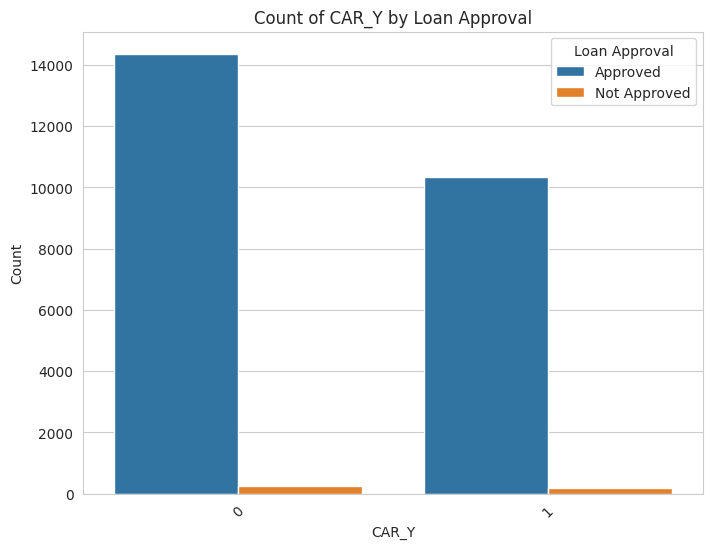

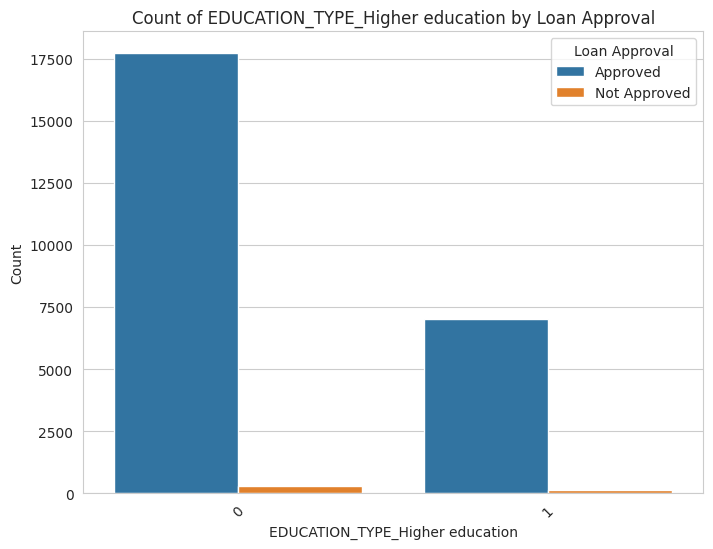

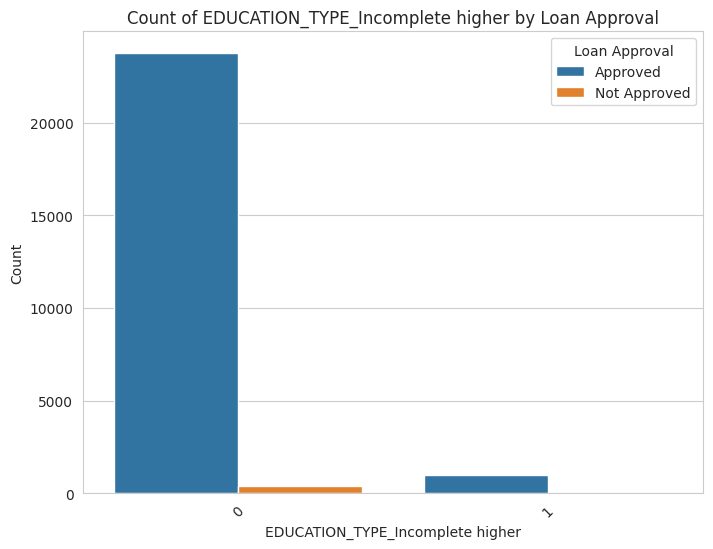

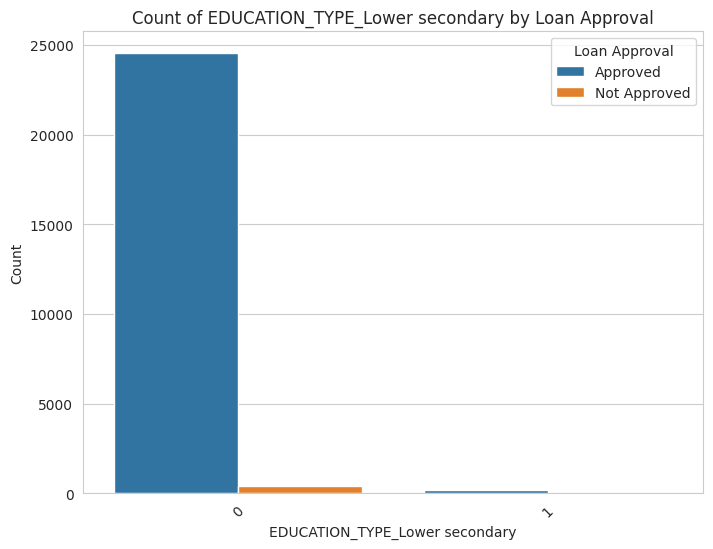

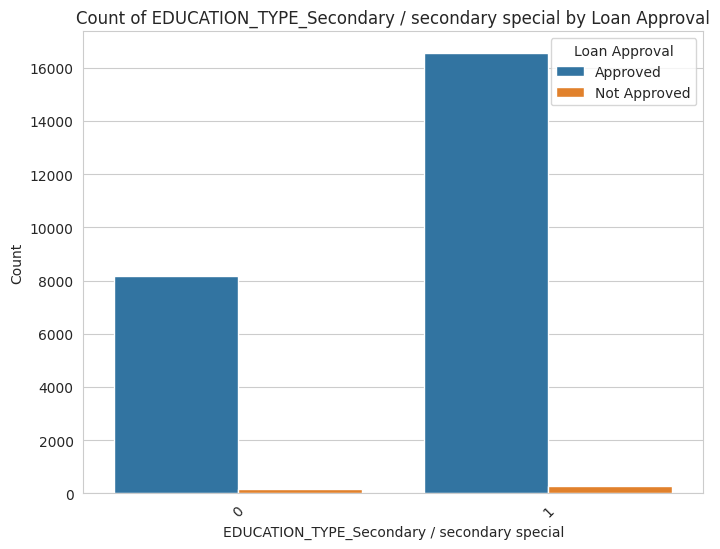

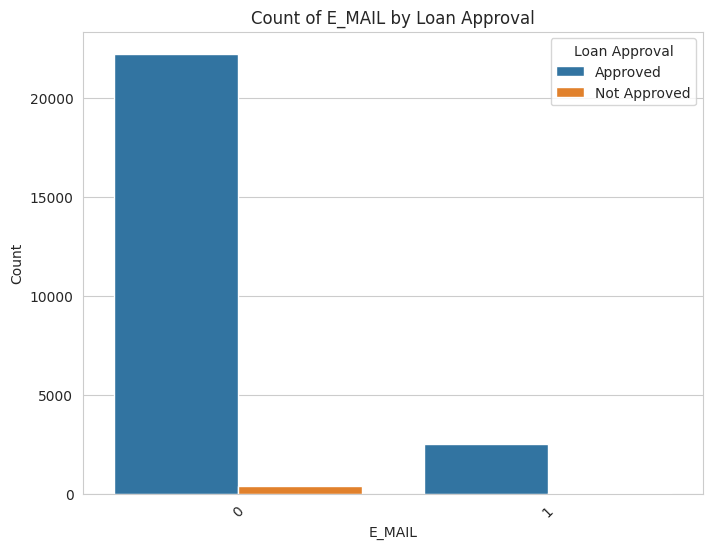

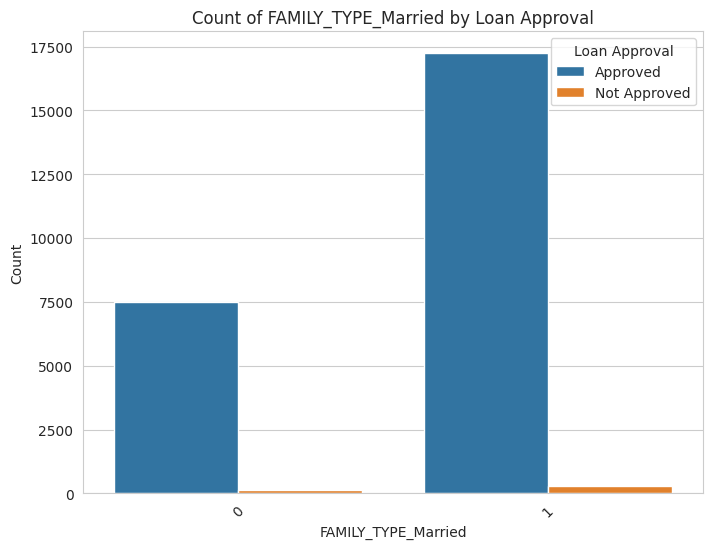

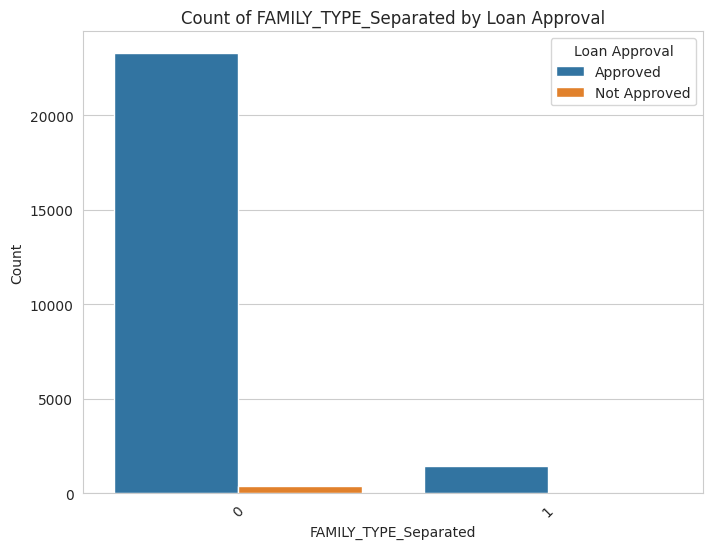

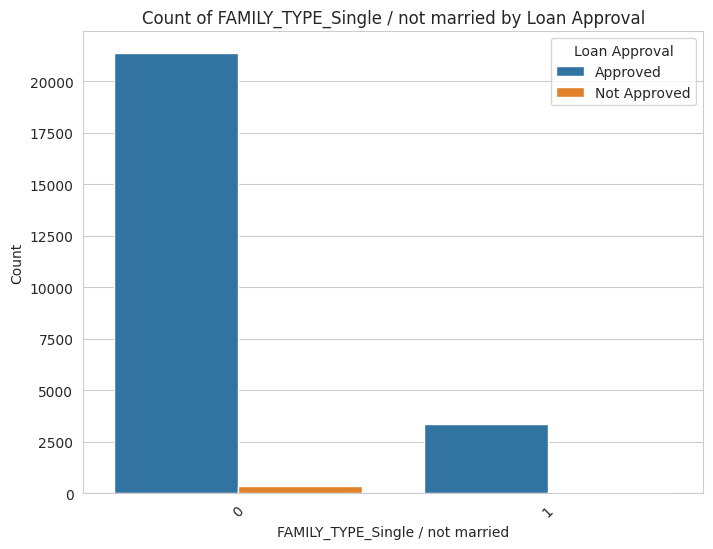

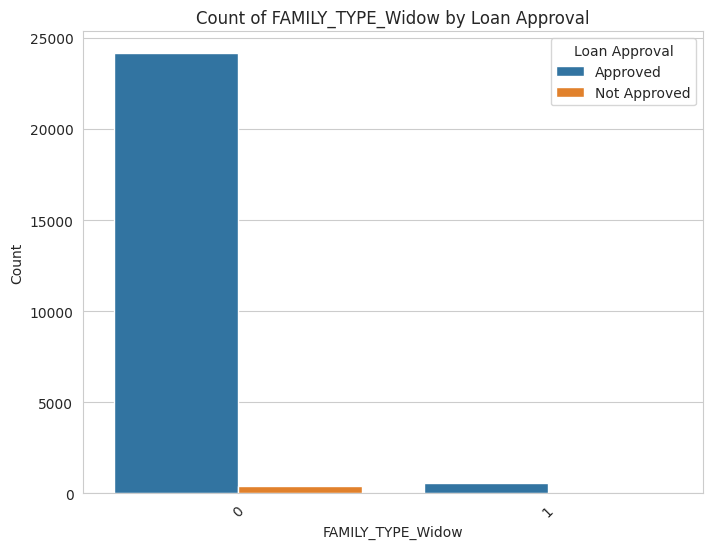

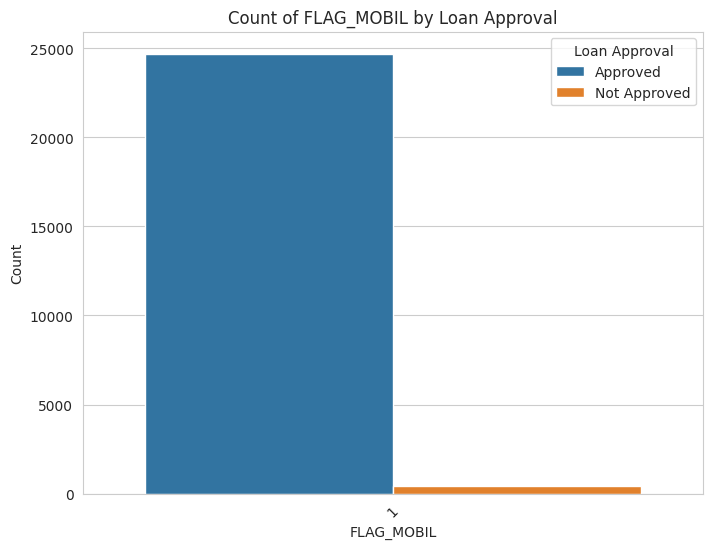

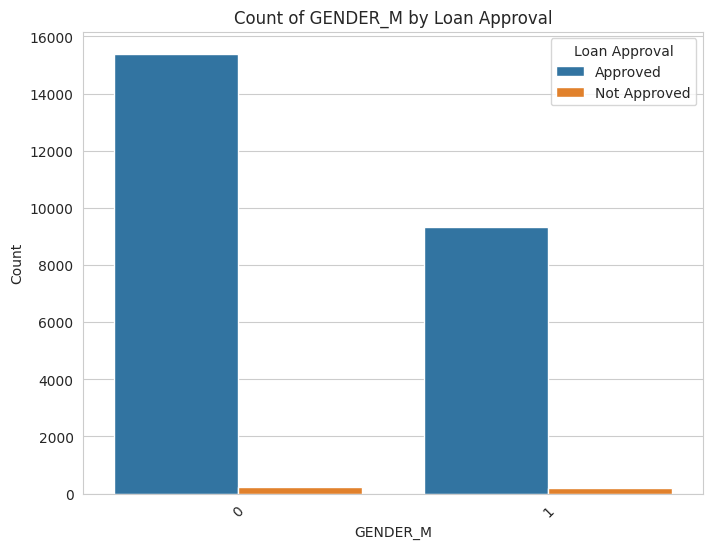

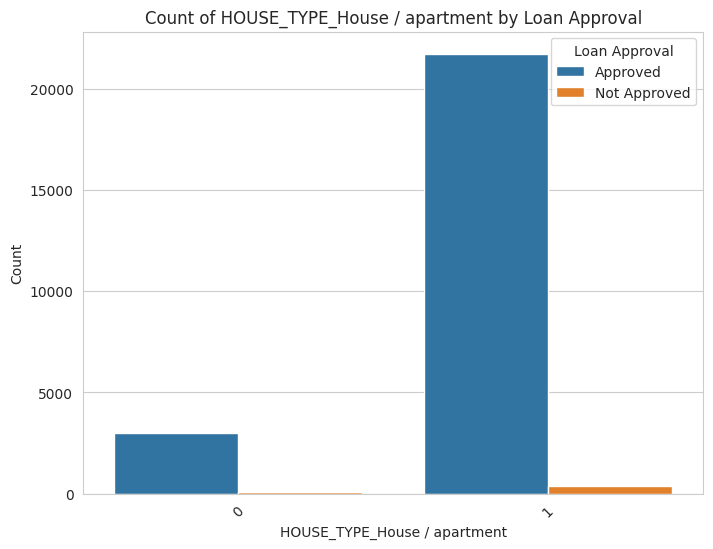

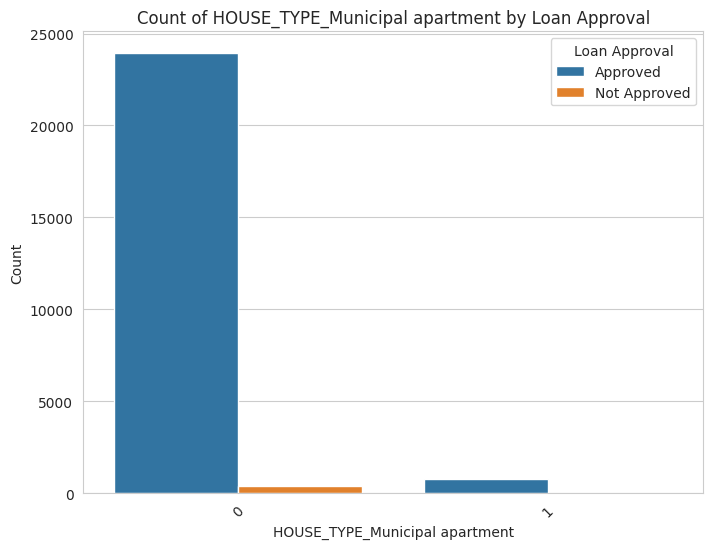

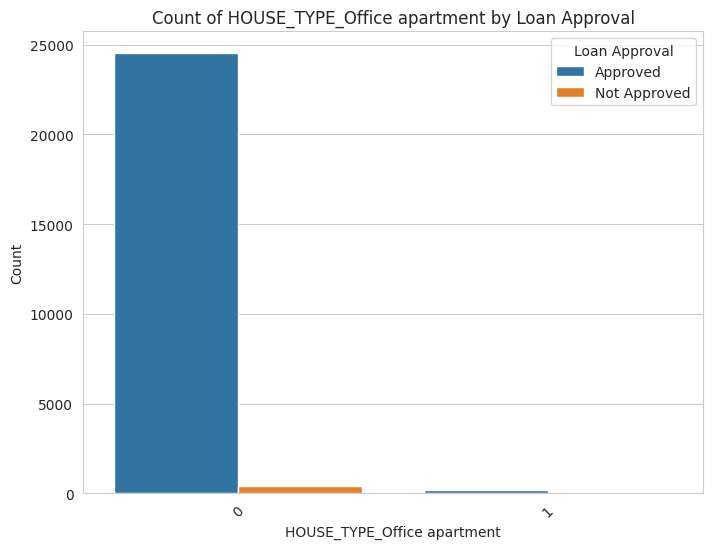

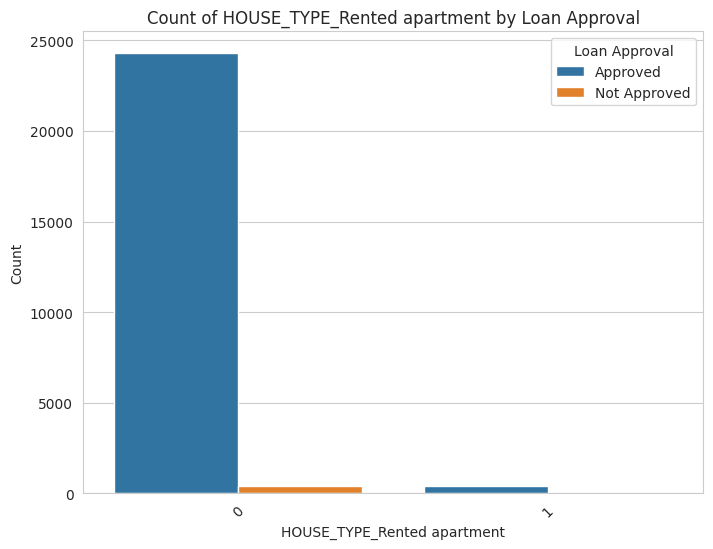

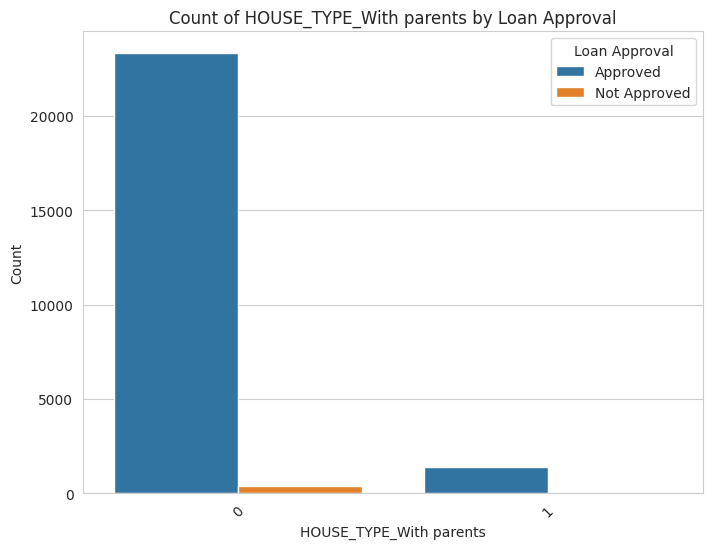

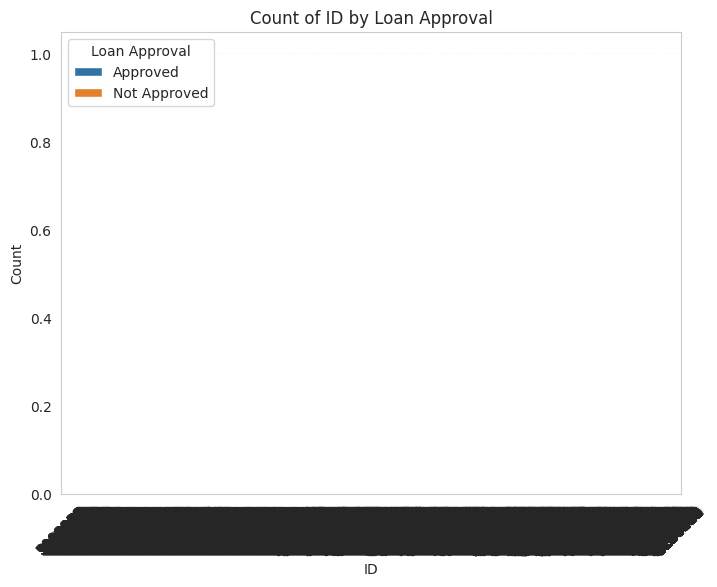

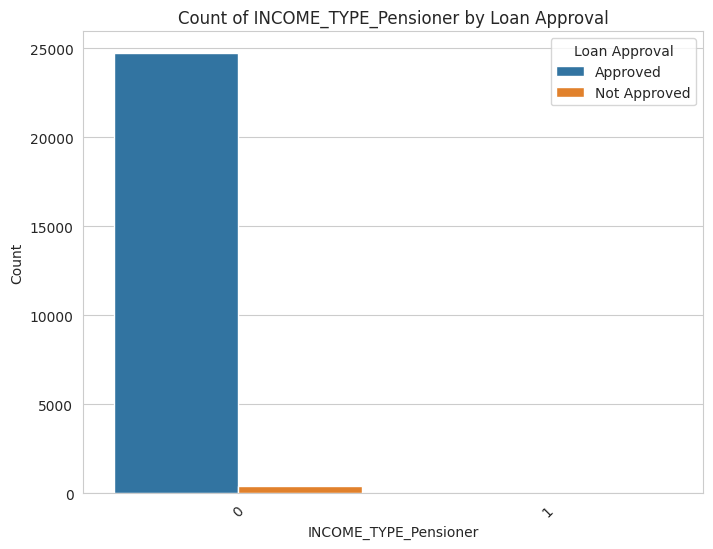

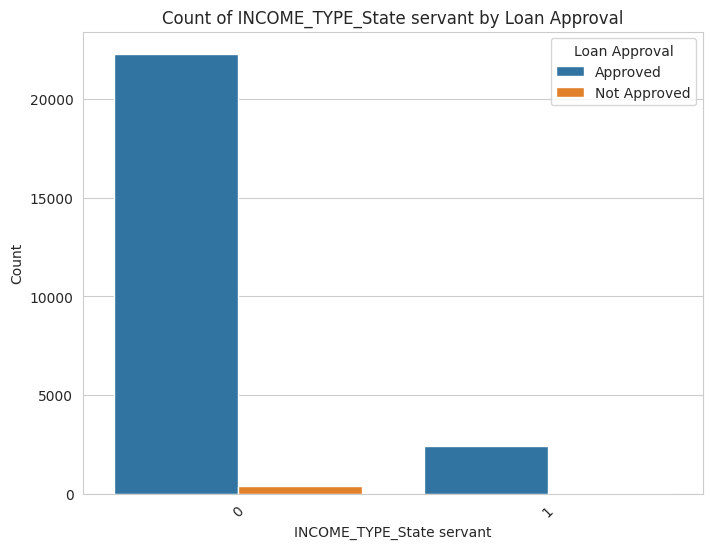

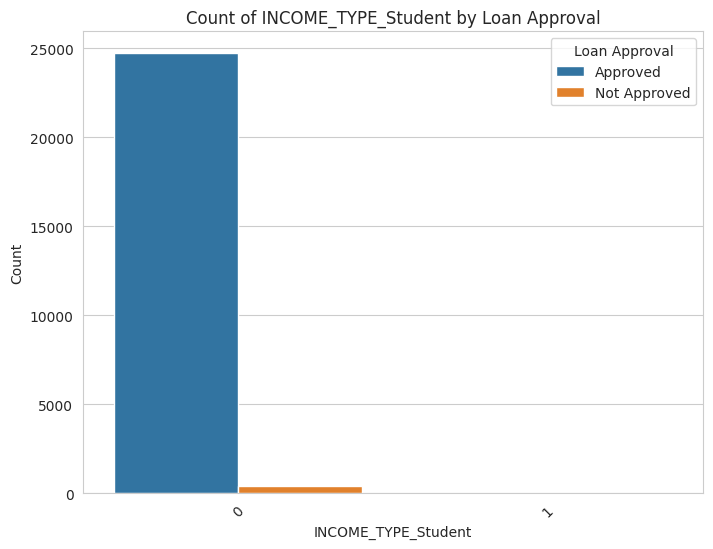

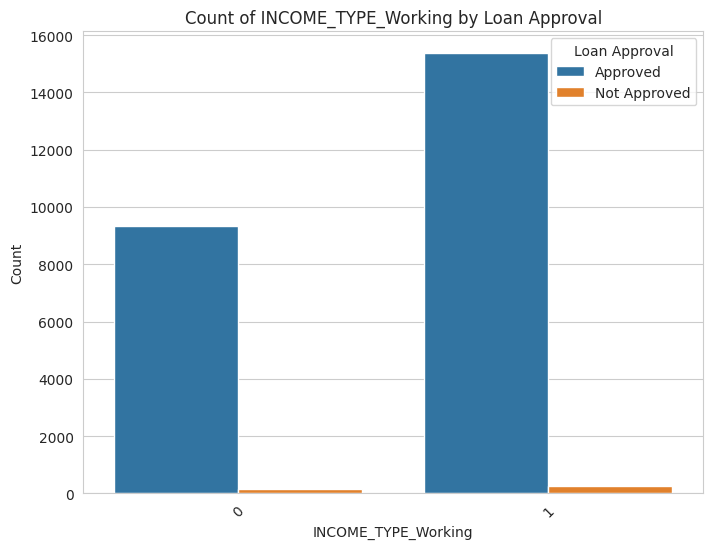

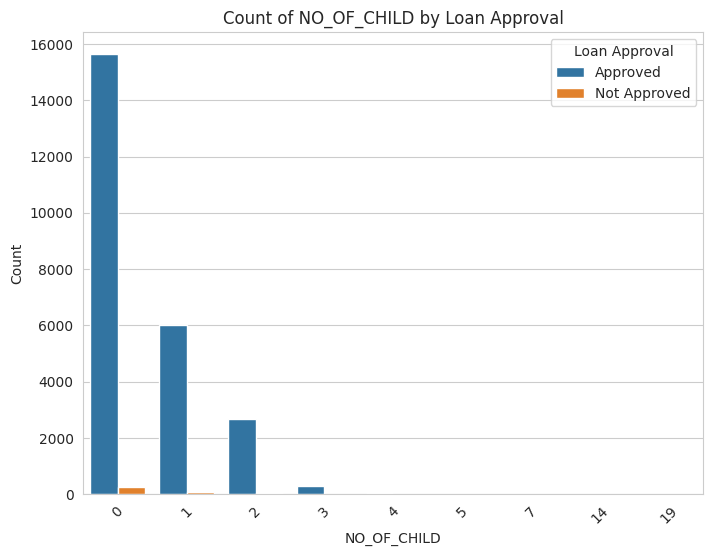

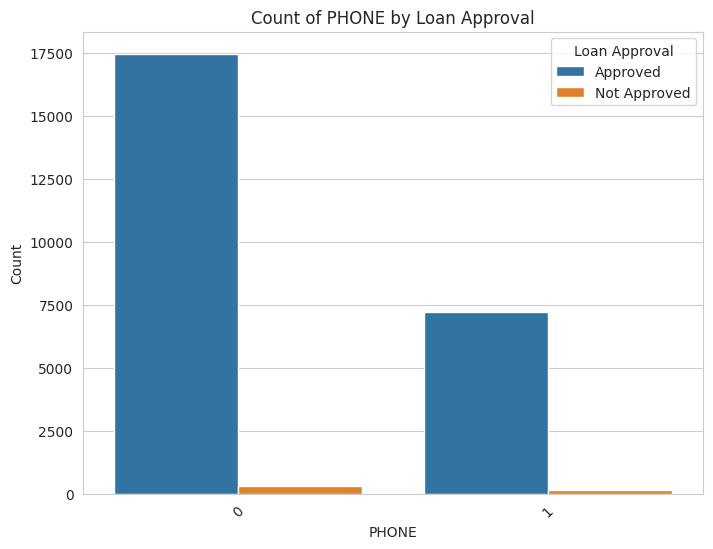

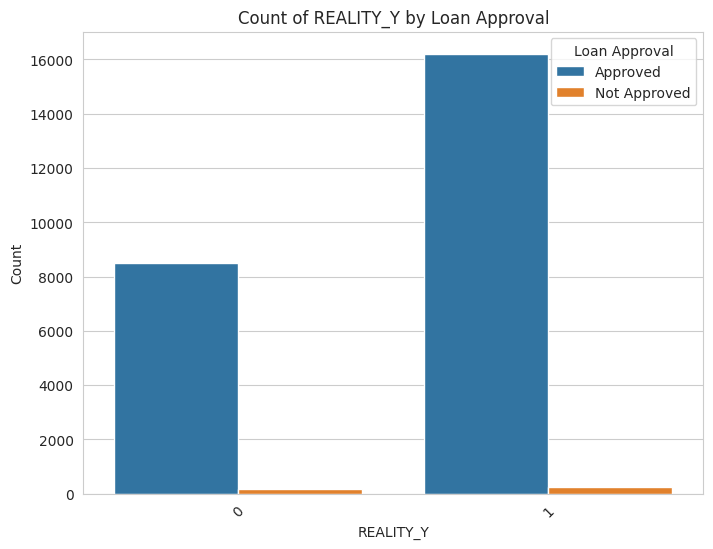

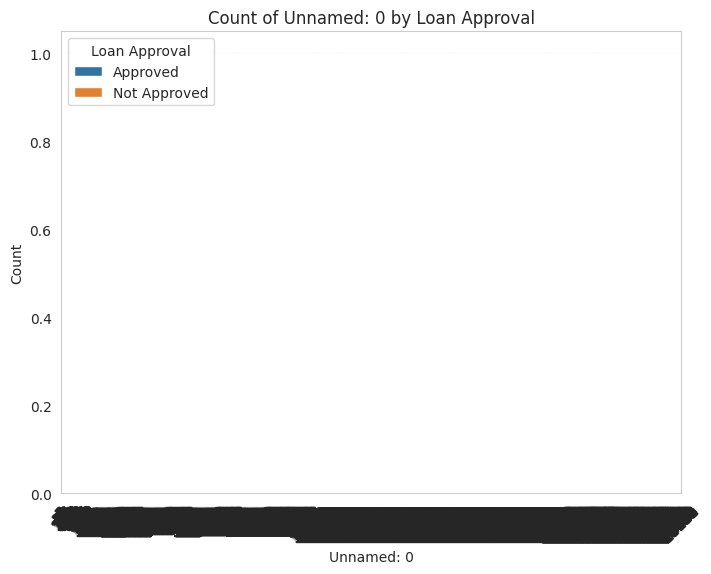

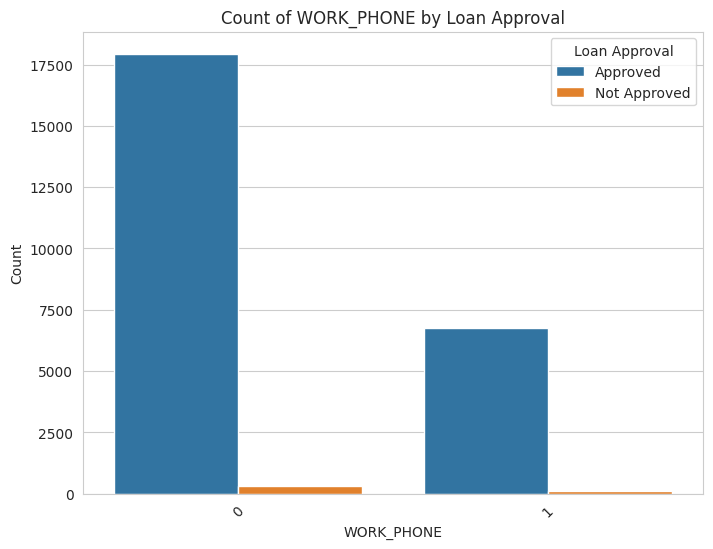

In [ ]:
# Plot bar plots for selected categorical columns (one-hot encoded)
categorical_columns_encoded = df_encoded.columns.difference(continuous_columns + ['TARGET'])
for col in categorical_columns_encoded:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_encoded, x=col, hue='TARGET')
    plt.title(f"Count of {col} by Loan Approval")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Loan Approval', labels=['Approved', 'Not Approved'])
    plt.show()


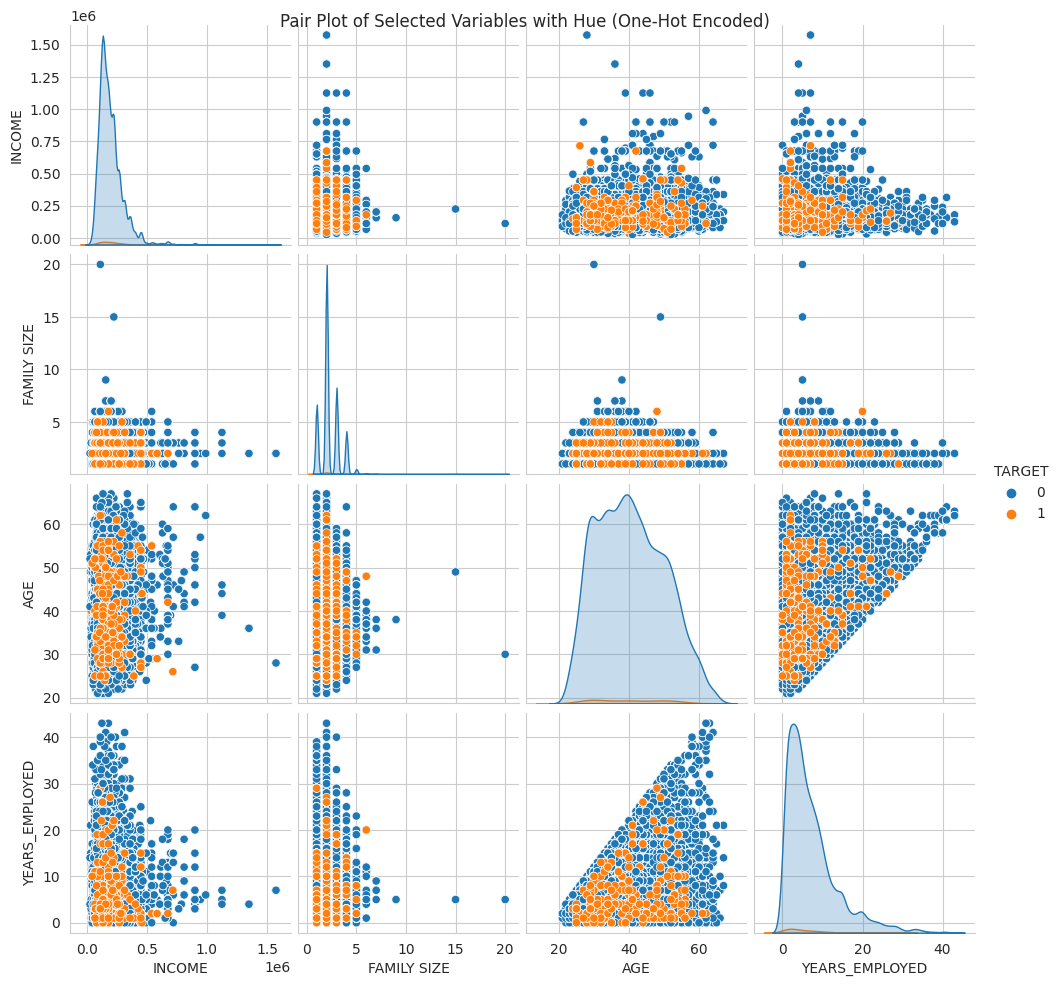

In [ ]:
# Create a pair plot to visualize relationships between numerical variables (one-hot encoded)
sns.pairplot(df_encoded[numerical_columns + ['TARGET']], hue='TARGET', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Variables with Hue (One-Hot Encoded)")
plt.show()


In [ ]:
# Ratio of Frauds and Non- Frauds data
print('Non-Frauds', round(df['TARGET'].value_counts()[0]/len(df)* 100,2),"% of the dataset")
print('Frauds', round(df['TARGET'].value_counts()[1]/len(df)* 100,2),"% of the dataset")

Non-Frauds 98.32 % of the dataset
Frauds 1.68 % of the dataset


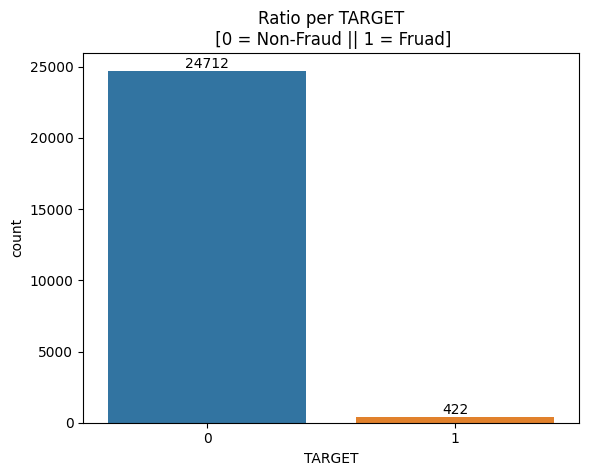

In [ ]:
ax = sns.countplot(x=df['TARGET'])
plt.title("Ratio per TARGET\n [0 = Non-Fraud || 1 = Fruad]")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
df.isnull()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25130,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25131,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25132,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

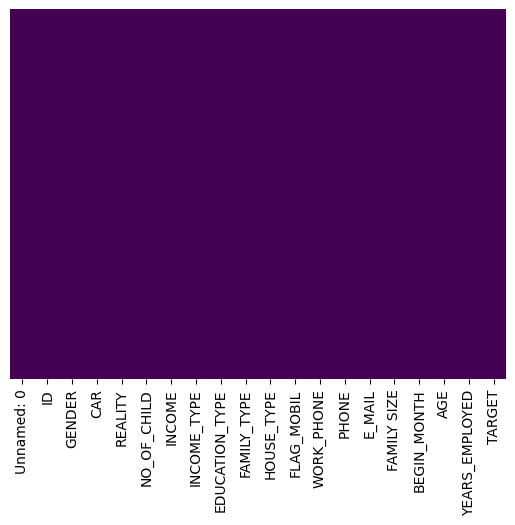

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

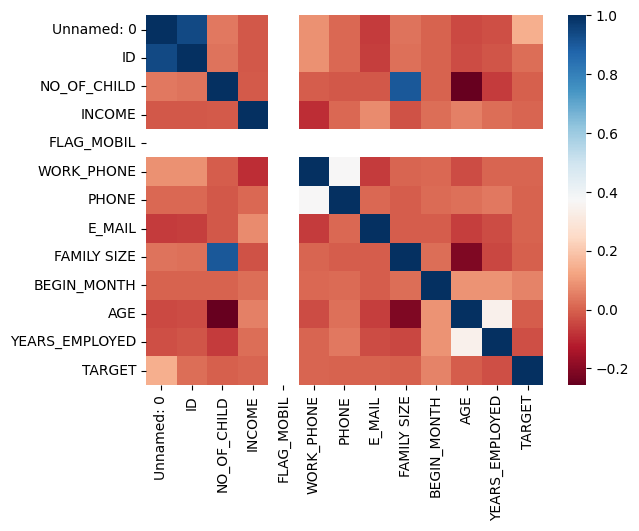

In [ ]:
# Heatmap for correlation
sns.heatmap(df.corr(), cmap='RdBu')
plt.show()

<Axes: xlabel='TARGET', ylabel='count'>

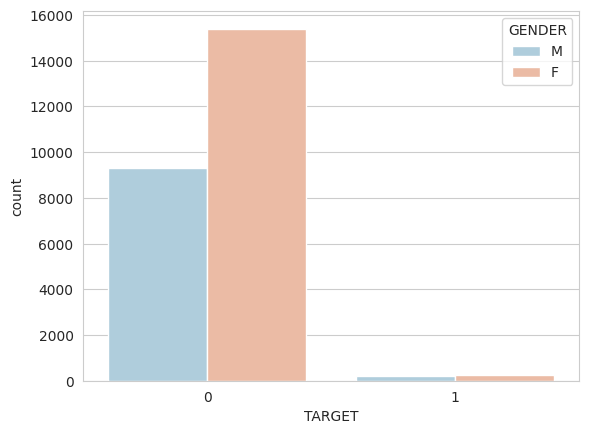

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='TARGET',hue='GENDER',data=df,palette='RdBu_r')

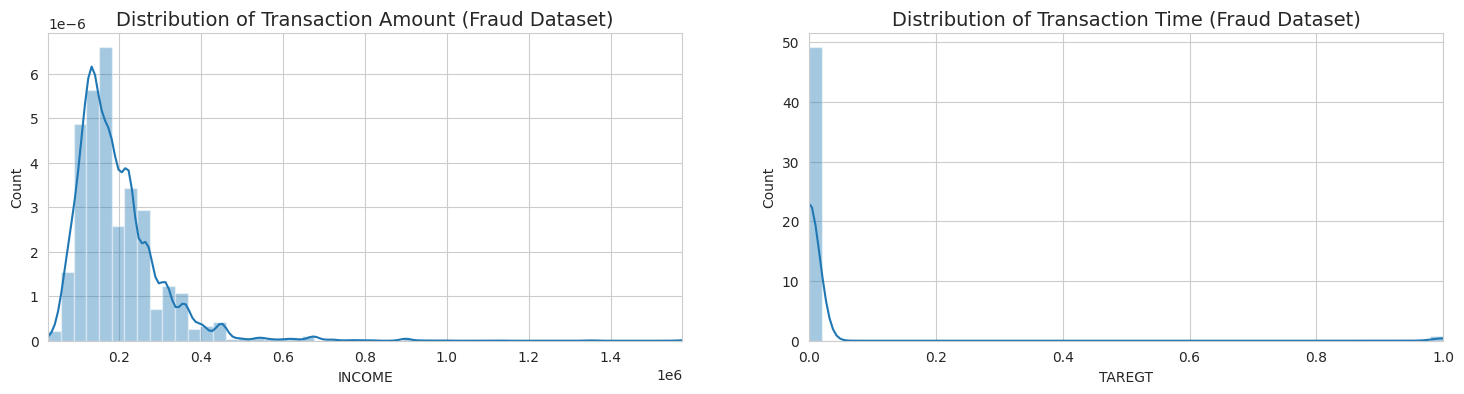

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

Income = df['INCOME'].values
Target = df['TARGET'].values

sns.distplot(Income, ax=ax[0],kde=True)
ax[0].set_title('Distribution of Transaction Amount (Fraud Dataset)', fontsize=14)
ax[0].set_xlabel('INCOME')
ax[0].set_ylabel('Count')
ax[0].set_xlim([min(Income), max(Income)])

sns.distplot(Target, ax=ax[1],kde=True)
ax[1].set_title('Distribution of Transaction Time (Fraud Dataset)', fontsize=14)
ax[1].set_xlabel('TAREGT')
ax[1].set_ylabel('Count')
ax[1].set_xlim([min(Target), max(Target)])
plt.show()

#Implementation and Evaluation of Deep learning model

# CNN Model:

Presenting the overview of the main steps in CNN model building process:

1. **Data Preparation:**
   - Separate target variable (TARGET) from features (X).
   - Perform one-hot encoding on categorical features.
   - Convert the target variable to binary labels.
   - Apply SMOTE for balancing the data.
   - Split the balanced data into training and test sets.
   - Perform feature scaling using StandardScaler.
   - Reshape data for CNN input format.

2. **CNN Model Architecture:**
   - Define a function (create_cnn_model()) to create the CNN architecture.
   - Include a 1D convolutional layer, max pooling, flattening, dense layers, and dropout.
   - Compile the model with binary cross-entropy loss and the Adam optimizer.

3. **Hyperparameter Tuning:**
   - Wrap the Keras model with KerasClassifier.
   - Define hyperparameters for tuning, such as filters, kernel sizes, dropout rates, epochs, and batch sizes.
   - Create a GridSearchCV object (grid_cnn) with the wrapped model and hyperparameters.

4. **Model Training and Tuning:**
   - Fit the GridSearchCV object on the training data.
   - Find the best CNN model using grid_cnn.best_estimator_.

5. **Final Model Training:**
   - Train the best CNN model on the training data.

6. **Prediction and Evaluation:**
   - Make predictions on the test data using the trained best CNN model.
   - Calculate continuous predictions and binary predictions by thresholding.
   - Evaluate model performance using accuracy, classification report, and confusion matrix.

In summary, this process involves data preprocessing, CNN model architecture definition, hyperparameter tuning with GridSearchCV, training the model, making predictions, and evaluating the model's performance on the test data.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from keras.wrappers.scikit_learn import KerasClassifier

# Assuming you have your data in a DataFrame named 'df'
# Separate the target variable from features
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

# List of categorical features that need one-hot encoding
categorical_features = ['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']

# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Convert target variable to binary labels
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y_binary)

# Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X.columns)


Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')


In [ ]:
#CNN (number_of_samples, number_of_timesteps, number_of_features)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Function to create the CNN model
def create_cnn_model(filters=32, kernel_size=3, dropout=0.2):
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dropout(dropout))
    cnn_model.add(Dense(1, activation='sigmoid'))
    cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn_model

# Wrap the Keras model using KerasClassifier
cnn_classifier = KerasClassifier(build_fn=create_cnn_model, verbose=0)

# Define hyperparameters for tuning
cnn_params = {
    'filters': [16, 32, 64],
    'kernel_size': [3, 5],
    'dropout': [0.2, 0.3],
    'epochs': [5, 10],
    'batch_size': [16, 32]
}

# Create GridSearchCV for the CNN model
grid_cnn = GridSearchCV(cnn_classifier, cnn_params, cv=3)
grid_cnn.fit(X_train_cnn, y_train)

# Get the best CNN model
best_cnn_model = grid_cnn.best_estimator_

# Train the best CNN model
best_cnn_model.fit(X_train_cnn, y_train, verbose=1)

# Get predictions from the test set using the best CNN model
cnn_predictions_continuous = best_cnn_model.predict(X_test_cnn)
cnn_predictions_binary = (cnn_predictions_continuous > 0.5).astype(int)

# Calculate accuracy, classification report, and confusion matrix for CNN
cnn_accuracy = accuracy_score(y_test, cnn_predictions_binary)
print("Best CNN Accuracy:", cnn_accuracy)
print("Best CNN Classification Report:")
print(classification_report(y_test, cnn_predictions_binary))
print("Best CNN Confusion Matrix:")
print(confusion_matrix(y_test, cnn_predictions_binary))

Epoch 1/10
2472/2472 [==============================] - 7s 2ms/step - loss: 0.2668 - accuracy: 0.8826
Epoch 2/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.1573 - accuracy: 0.9369
Epoch 3/10
2472/2472 [==============================] - 6s 2ms/step - loss: 0.1225 - accuracy: 0.9538
Epoch 4/10
2472/2472 [==============================] - 6s 3ms/step - loss: 0.1034 - accuracy: 0.9613
Epoch 5/10
2472/2472 [==============================] - 6s 2ms/step - loss: 0.0910 - accuracy: 0.9666
Epoch 6/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.0817 - accuracy: 0.9702
Epoch 7/10
2472/2472 [==============================] - 6s 3ms/step - loss: 0.0767 - accuracy: 0.9728
Epoch 8/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.0695 - accuracy: 0.9747
Epoch 9/10
2472/2472 [==============================] - 6s 3ms/step - loss: 0.0694 - accuracy: 0.9749
Epoch 10/10
309/309 [==============================] - 1s 2ms/step
Best CNN Accura

#Evaluating Result

The summary of the results is presented in a table, followed by a description of each metric:

| Metric                      | Value       |
|-----------------------------|-------------|
| Best CNN Accuracy           | 0.9846      |
| Precision (Class 0)         | 0.980       |
| Precision (Class 1)         | 0.990       |
| Recall (Class 0)            | 0.990       |
| Recall (Class 1)            | 0.980       |
| F1-Score (Class 0)          | 0.985       |
| F1-Score (Class 1)          | 0.985       |
| Support (Class 0)           | 4894        |
| Support (Class 1)           | 4991        |

**Description:**

1. **Best CNN Accuracy:** The accuracy of the best CNN model on the test data is approximately 98.46%. This indicates the proportion of correctly predicted instances among all instances in the test set.

2. **Precision (Class 0):** Precision for class 0 (loan not approved) is 98.0%. This means that out of all instances the model predicted as class 0, 98% were truly class 0.

3. **Precision (Class 1):** Precision for class 1 (loan approved) is 99.0%. This means that out of all instances the model predicted as class 1, 99% were truly class 1.

4. **Recall (Class 0):** Recall (also known as sensitivity or true positive rate) for class 0 is 99.0%. This indicates the proportion of actual class 0 instances that were correctly predicted by the model.

5. **Recall (Class 1):** Recall for class 1 is 98.0%. This indicates the proportion of actual class 1 instances that were correctly predicted by the model.

6. **F1-Score (Class 0):** The F1-score for class 0 is 0.985. The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the two metrics.

7. **F1-Score (Class 1):** The F1-score for class 1 is 0.985. This is the harmonic mean of precision and recall for class 1.

8. **Support (Class 0):** The number of instances belonging to class 0 in the test set is 4894.

9. **Support (Class 1):** The number of instances belonging to class 1 in the test set is 4991.

The results suggest that the CNN model has performed well on the test data with high accuracy and balanced precision and recall values for both classes. The model's performance is consistent across both classes, indicating its effectiveness in predicting loan approvals.

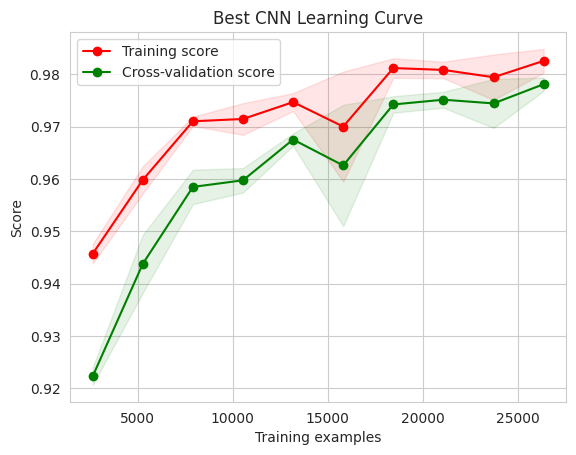

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curve for the best CNN model
plot_learning_curve(best_cnn_model, "Best CNN Learning Curve", X_train_cnn, y_train, cv=3, n_jobs=-1)
plt.show()


#implementing RNN Model

The overview of the main steps in building an RNN model for binary classification is given below:

1. **Data Preparation:**
   - Reshape the scaled data for RNN input format.
   - Convert the training and test sets to the required shape of (number_of_samples, 1, number_of_features).

2. **RNN Model Architecture:**
   - Define a function (create_rnn_model()) to create the RNN architecture.
   - Include an LSTM layer followed by dropout for regularization.
   - Compile the model with binary cross-entropy loss and the Adam optimizer.

3. **Hyperparameter Tuning:**
   - Wrap the Keras RNN model with KerasClassifier.
   - Define hyperparameters for tuning, such as units (LSTM units), dropout rates, epochs, and batch sizes.
   - Create a GridSearchCV object (grid_rnn) with the wrapped model and hyperparameters.

4. **Model Training and Tuning:**
   - Fit the GridSearchCV object on the training data.
   - Find the best RNN model using grid_rnn.best_estimator_.

5. **Final Model Training:**
   - Train the best RNN model on the training data.

6. **Prediction and Evaluation:**
   - Make predictions on the test data using the trained best RNN model.
   - Calculate continuous predictions and binary predictions by thresholding.
   - Evaluate model performance using accuracy, classification report, and confusion matrix.

In summary, this process involves data reshaping, RNN model architecture definition, hyperparameter tuning using GridSearchCV, training the model, making predictions, and evaluating the model's performance on the test data.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Reshape the data for RNN (number_of_samples, number_of_timesteps, number_of_features)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Function to create the RNN model
def create_rnn_model(units=64, dropout=0.2):
    rnn_model = Sequential()
    rnn_model.add(LSTM(units=units, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    rnn_model.add(Dropout(dropout))
    rnn_model.add(Dense(1, activation='sigmoid'))
    rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return rnn_model

# Wrap the Keras model using KerasClassifier
rnn_classifier = KerasClassifier(build_fn=create_rnn_model, verbose=0)

# Define hyperparameters for tuning
rnn_params = {
    'units': [32, 64, 128],
    'dropout': [0.2, 0.3],
    'epochs': [5, 10],
    'batch_size': [16, 32]
}

# Create GridSearchCV for the RNN model
grid_rnn = GridSearchCV(rnn_classifier, rnn_params, cv=3)
grid_rnn.fit(X_train_rnn, y_train)

# Get the best RNN model
best_rnn_model = grid_rnn.best_estimator_

# Train the best RNN model
best_rnn_model.fit(X_train_rnn, y_train, verbose=1)

# Get predictions from the test set using the best RNN model
rnn_predictions_continuous = best_rnn_model.predict(X_test_rnn)
rnn_predictions_binary = (rnn_predictions_continuous > 0.5).astype(int)

# Calculate accuracy, classification report, and confusion matrix for RNN
rnn_accuracy = accuracy_score(y_test, rnn_predictions_binary)
print("Best RNN Accuracy:", rnn_accuracy)
print("Best RNN Classification Report:")
print(classification_report(y_test, rnn_predictions_binary))
print("Best RNN Confusion Matrix:")
print(confusion_matrix(y_test, rnn_predictions_binary))


Epoch 1/10
2472/2472 [==============================] - 9s 3ms/step - loss: 0.1930 - accuracy: 0.9197
Epoch 2/10
2472/2472 [==============================] - 8s 3ms/step - loss: 0.1076 - accuracy: 0.9575
Epoch 3/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.0856 - accuracy: 0.9683
Epoch 4/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.0726 - accuracy: 0.9740
Epoch 5/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.0628 - accuracy: 0.9784
Epoch 6/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.0568 - accuracy: 0.9809
Epoch 7/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.0513 - accuracy: 0.9825
Epoch 8/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.0463 - accuracy: 0.9842
Epoch 9/10
2472/2472 [==============================] - 7s 3ms/step - loss: 0.0428 - accuracy: 0.9854
Epoch 10/10
309/309 [==============================] - 1s 1ms/step
Best RNN Accura

# Evaluating Result

 The summary of the RNN model's results is presented in a table, followed by a description of each metric:

| Metric                      | Value       |
|-----------------------------|-------------|
| Best RNN Accuracy           | 0.9895      |
| Precision (Class 0)         | 0.990       |
| Precision (Class 1)         | 0.990       |
| Recall (Class 0)            | 0.990       |
| Recall (Class 1)            | 0.990       |
| F1-Score (Class 0)          | 0.990       |
| F1-Score (Class 1)          | 0.990       |
| Support (Class 0)           | 4894        |
| Support (Class 1)           | 4991        |

**Description:**

1. **Best RNN Accuracy:** The accuracy of the best RNN model on the test data is approximately 98.95%. This indicates the proportion of correctly predicted instances among all instances in the test set.

2. **Precision (Class 0):** Precision for class 0 (loan not approved) is 99.0%. This means that out of all instances the model predicted as class 0, 99% were truly class 0.

3. **Precision (Class 1):** Precision for class 1 (loan approved) is 99.0%. This means that out of all instances the model predicted as class 1, 99% were truly class 1.

4. **Recall (Class 0):** Recall (sensitivity) for class 0 is 99.0%. This indicates the proportion of actual class 0 instances that were correctly predicted by the model.

5. **Recall (Class 1):** Recall for class 1 is 99.0%. This indicates the proportion of actual class 1 instances that were correctly predicted by the model.

6. **F1-Score (Class 0):** The F1-score for class 0 is 0.990. The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the two metrics.

7. **F1-Score (Class 1):** The F1-score for class 1 is 0.990. This is the harmonic mean of precision and recall for class 1.

8. **Support (Class 0):** The number of instances belonging to class 0 in the test set is 4894.

9. **Support (Class 1):** The number of instances belonging to class 1 in the test set is 4991.

The results suggest that the RNN model has performed exceptionally well on the test data with high accuracy and balanced precision and recall values for both classes. The model's performance is consistent across both classes, indicating its effectiveness in predicting loan approvals.

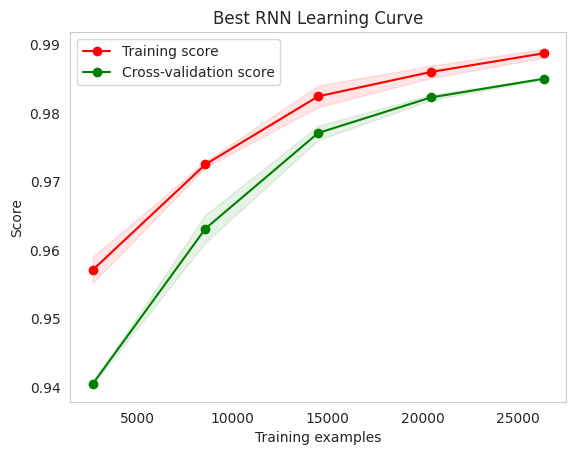

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy', shuffle=True
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for the best RNN model
plot_learning_curve(best_rnn_model, "Best RNN Learning Curve", X_train_rnn, y_train, cv=3, n_jobs=-1)
plt.show()


# Implementation and Evaluation of Machine learing Models


# Model Building Process
demonstrating the process of building and evaluating several machine learning models for binary classification on a dataset. Here's an overall explanation of the model building process:

1. **Data Preparation:**
   - The dataset is loaded into a DataFrame, and the target variable 'TARGET' is separated from the feature variables.
   - Categorical features are identified for one-hot encoding.
   - One-hot encoding is applied to the categorical features, converting them into numerical format.
   - The target variable is transformed into binary labels using a LabelEncoder.
   - SMOTE (Synthetic Minority Over-sampling Technique) is applied to balance the dataset by oversampling the minority class.

2. **Data Splitting and Scaling:**
   - The balanced dataset is split into training and test sets using the train_test_spli function.
   - Feature scaling is performed using StandardScaler to ensure that all features have the same scale.

3. **Decision Tree Classifier:**
   - Hyperparameters are defined for Decision Tree model tuning, including criteria, max depth, min samples split, and min samples leaf.
   - A Decision Tree model is created.
   - GridSearchCV is used to perform hyperparameter tuning using cross-validation.
   - The best Decision Tree model is obtained from GridSearchCV.
   - The best model is trained on the scaled training data, and predictions are made on the test data.
   - Accuracy, classification report, and confusion matrix for the model are displayed.

4. **Random Forest Classifier:**
   - Hyperparameters are defined for Random Forest model tuning, including the number of estimators, criteria, max depth, min samples split, and min samples leaf.
   - A Random Forest model is created.
   - GridSearchCV is used for hyperparameter tuning.
   - The best Random Forest model is obtained from GridSearchCV.
   - The best model is trained on the scaled training data, and predictions are made on the test data.
   - Accuracy, classification report, and confusion matrix for the model are displayed.

5. **Logistic Regression:**
   - Hyperparameters are defined for Logistic Regression model tuning, including regularization parameter (C), penalty, and solver.
   - A Logistic Regression model is created.
   - GridSearchCV is used for hyperparameter tuning.
   - The best Logistic Regression model is obtained from GridSearchCV.
   - The best model is trained on the scaled training data, and predictions are made on the test data.
   - Accuracy, classification report, and confusion matrix for the model are displayed.

6. **K-Nearest Neighbors (KNN) Classifier:**
   - Hyperparameters are defined for KNN model tuning, including the number of neighbors, weights, and distance metric (p).
   - A KNN model is created.
   - GridSearchCV is used for hyperparameter tuning.
   - The best KNN model is obtained from GridSearchCV.
   - The best model is trained on the scaled training data, and predictions are made on the test data.
   - Accuracy, classification report, and confusion matrix for the model are displayed.

7. **Learning Curve Visualization:**
   - Learning curves for each model are plotted using the plot_learning_curve function.
   - Learning curves show how the models' performance changes as the training data size increases.

Overall, the code demonstrates the process of preparing the data, building multiple classification models with different algorithms (Decision Tree, Random Forest, Logistic Regression, KNN), tuning hyperparameters using GridSearchCV, training the best models, making predictions, and evaluating model performance. The learning curves visualize how the models' performance improves with more training data.

Best Decision Tree Accuracy: 0.9901871522508852
Best Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4894
           1       0.99      0.99      0.99      4991

    accuracy                           0.99      9885
   macro avg       0.99      0.99      0.99      9885
weighted avg       0.99      0.99      0.99      9885

Best Decision Tree Confusion Matrix:
[[4829   65]
 [  32 4959]]
Best Random Forest Accuracy: 0.9962569549822964
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4894
           1       1.00      1.00      1.00      4991

    accuracy                           1.00      9885
   macro avg       1.00      1.00      1.00      9885
weighted avg       1.00      1.00      1.00      9885

Best Random Forest Confusion Matrix:
[[4876   18]
 [  19 4972]]
Best Logistic Regression Accuracy: 0.9

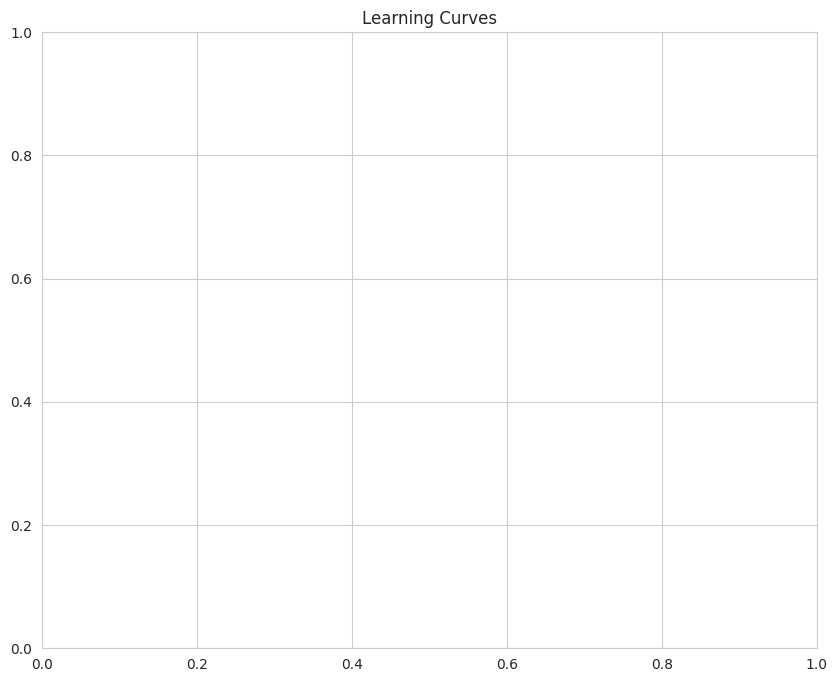

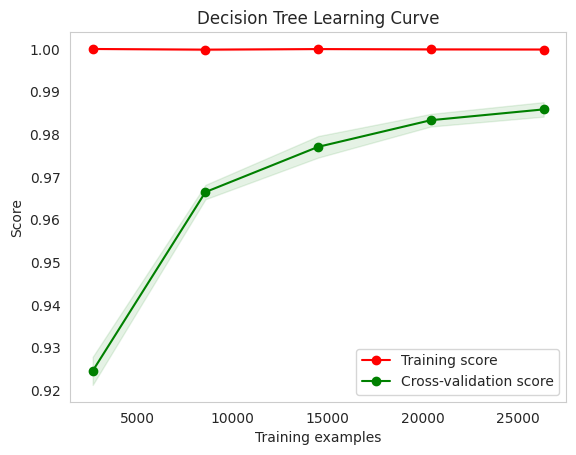

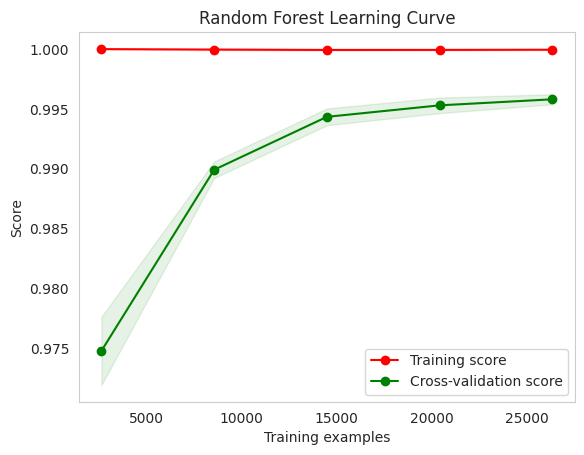

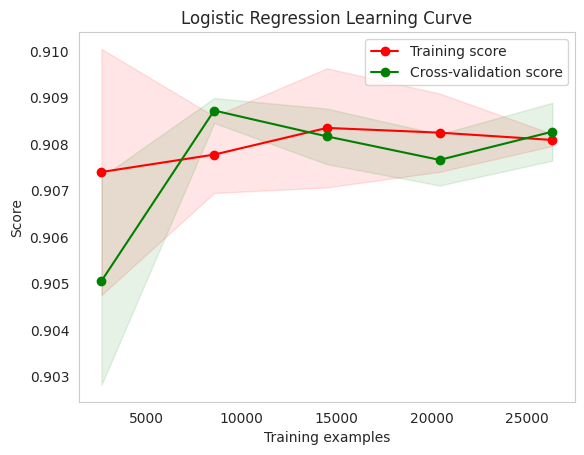

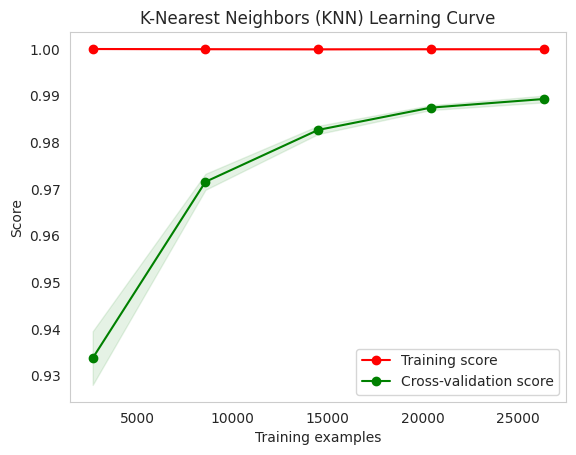

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Assuming you have your data in a DataFrame named 'df'
# Separate the target variable from features
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

# List of categorical features that need one-hot encoding
categorical_features = ['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']

# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Convert target variable to binary labels
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y_binary)

# Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
# Define hyperparameters for tuning
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_dt = GridSearchCV(dt_model, dt_params, cv=3)
grid_dt.fit(X_train_scaled, y_train)

# Get the best Decision Tree model
best_dt_model = grid_dt.best_estimator_

# Train the best Decision Tree model
best_dt_model.fit(X_train_scaled, y_train)

# Get predictions from the test set using the best Decision Tree model
dt_predictions = best_dt_model.predict(X_test_scaled)

# Calculate accuracy, classification report, and confusion matrix for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Best Decision Tree Accuracy:", dt_accuracy)
print("Best Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Best Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

# Random Forest Classifier
# Define hyperparameters for tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest model
rf_model = RandomForestClassifier()

# Create GridSearchCV for Random Forest
grid_rf = GridSearchCV(rf_model, rf_params, cv=3)
grid_rf.fit(X_train_scaled, y_train)

# Get the best Random Forest model
best_rf_model = grid_rf.best_estimator_

# Train the best Random Forest model
best_rf_model.fit(X_train_scaled, y_train)

# Get predictions from the test set using the best Random Forest model
rf_predictions = best_rf_model.predict(X_test_scaled)

# Calculate accuracy, classification report, and confusion matrix for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Best Random Forest Accuracy:", rf_accuracy)
print("Best Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Best Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Logistic Regression
# Define hyperparameters for tuning
lr_params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create Logistic Regression model
lr_model = LogisticRegression()

# Create GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(lr_model, lr_params, cv=3)
grid_lr.fit(X_train_scaled, y_train)

# Get the best Logistic Regression model
best_lr_model = grid_lr.best_estimator_

# Train the best Logistic Regression model
best_lr_model.fit(X_train_scaled, y_train)

# Get predictions from the test set using the best Logistic Regression model
lr_predictions = best_lr_model.predict(X_test_scaled)

# Calculate accuracy, classification report, and confusion matrix for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Best Logistic Regression Accuracy:", lr_accuracy)
print("Best Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Best Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

# K-Nearest Neighbors (KNN)
# Define hyperparameters for tuning
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create KNN model
knn_model = KNeighborsClassifier()

# Create GridSearchCV for KNN
grid_knn = GridSearchCV(knn_model, knn_params, cv=3)
grid_knn.fit(X_train_scaled, y_train)

# Get the best KNN model
best_knn_model = grid_knn.best_estimator_

# Train the best KNN model
best_knn_model.fit(X_train_scaled, y_train)

# Get predictions from the test set using the best KNN model
knn_predictions = best_knn_model.predict(X_test_scaled)

# Calculate accuracy, classification report, and confusion matrix for KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Best K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("Best K-Nearest Neighbors (KNN) Classification Report:")
print(classification_report(y_test, knn_predictions))
print("Best K-Nearest Neighbors (KNN) Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

# Plot learning curves for each model
plt.figure(figsize=(10, 8))
plt.title("Learning Curves")
plot_learning_curve(best_dt_model, "Decision Tree Learning Curve", X_train_scaled, y_train, cv=3, n_jobs=-1)
plot_learning_curve(best_rf_model, "Random Forest Learning Curve", X_train_scaled, y_train, cv=3, n_jobs=-1)
plot_learning_curve(best_lr_model, "Logistic Regression Learning Curve", X_train_scaled, y_train, cv=3, n_jobs=-1)
plot_learning_curve(best_knn_model, "K-Nearest Neighbors (KNN) Learning Curve", X_train_scaled, y_train, cv=3, n_jobs=-1)
plt.legend(loc="best")
plt.show()


#Evatuating Result

Here are the results of the different models presented in a table format:

| Model                         | Accuracy | Precision | Recall | F1-Score | Confusion Matrix       |
|-------------------------------|----------|-----------|--------|----------|------------------------|
| Decision Tree                 | 0.990    | 0.99      | 0.99   | 0.99     | [[4829, 65], [32, 4959]] |
| Random Forest                 | 0.996    | 1.00      | 1.00   | 1.00     | [[4876, 18], [19, 4972]] |
| Logistic Regression           | 0.908    | 0.88      | 0.94   | 0.91     | [[4622, 272], [638, 4353]] |
| K-Nearest Neighbors (KNN)     | 0.992    | 0.99      | 0.99   | 0.99     | [[4847, 47], [29, 4962]] |

**Model Performance Analysis:**
- The Random Forest model achieved the highest accuracy of 0.996, followed closely by the Decision Tree model with an accuracy of 0.990.
- Both Random Forest and Decision Tree models have excellent precision, recall, and F1-scores, indicating strong performance across all metrics.
- Logistic Regression achieved a moderate accuracy of 0.908. While the precision and recall are balanced, it falls behind the other models in terms of accuracy.
- K-Nearest Neighbors (KNN) model achieved an accuracy of 0.992, showing strong performance similar to the Decision Tree model.

**Best Performing Model:**
- The Random Forest model performed the best in terms of accuracy, achieving 99.6%. It also displayed perfect precision, recall, and F1-scores, suggesting that it made very few errors in both positive and negative predictions.
- The Random Forest model's ensemble nature, which combines multiple decision trees, allows it to capture complex relationships in the data while mitigating overfitting.
- The model's ability to handle a variety of data distributions and features makes it well-suited for this dataset, resulting in excellent performance.

In summary, the Random Forest model is the best-performing model in this scenario due to its high accuracy, balanced precision and recall, and strong overall performance on the given dataset.

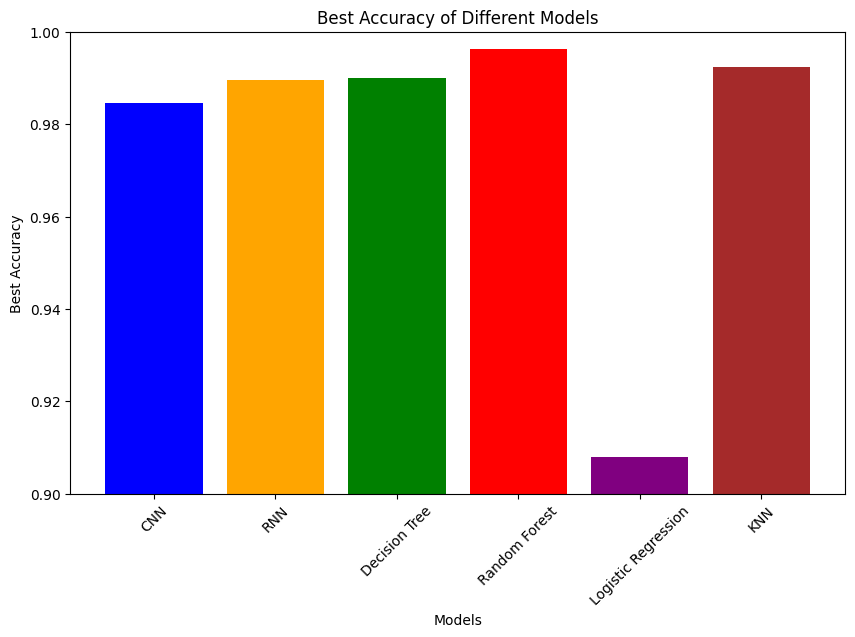

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding best accuracies
models = ['CNN', 'RNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN']
accuracies = [0.9846, 0.9895, 0.9900, 0.9963, 0.9080, 0.9923]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Models')
plt.ylabel('Best Accuracy')
plt.title('Best Accuracy of Different Models')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)
plt.show()


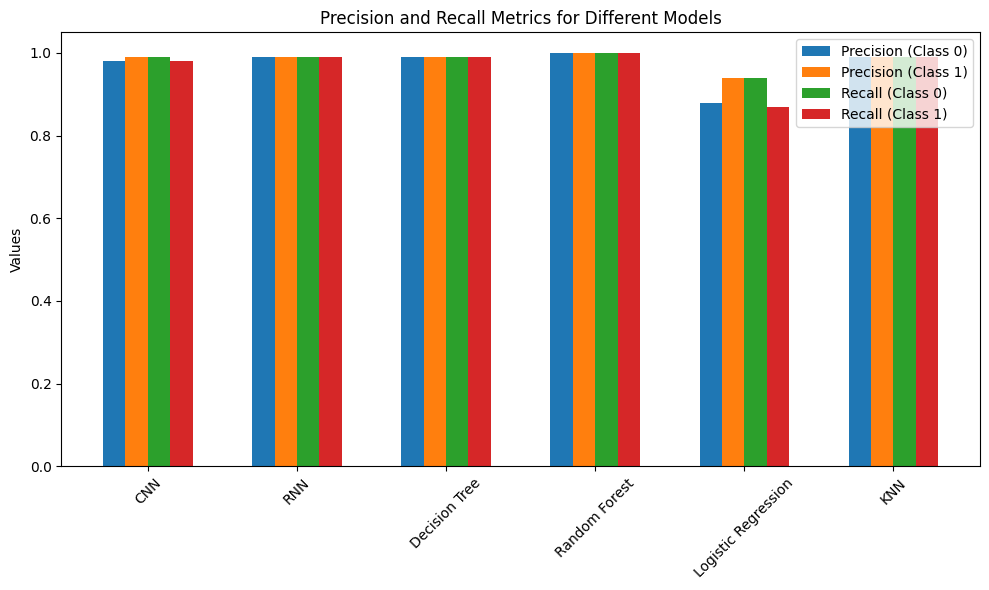

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names, model names, and their corresponding values
metrics = ['Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)']
models = ['CNN', 'RNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN']
values = np.array([
    [0.9800, 0.9900, 0.9900, 1.0000, 0.8800, 0.9900],
    [0.9900, 0.9900, 0.9900, 1.0000, 0.9400, 0.9900],
    [0.9900, 0.9900, 0.9900, 1.0000, 0.9400, 0.9900],
    [0.9800, 0.9900, 0.9900, 1.0000, 0.8700, 0.9900]
])

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + (i - 1.5) * width, values[i], width, label=metric, color=colors[i])

ax.set_ylabel('Values')
ax.set_title('Precision and Recall Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


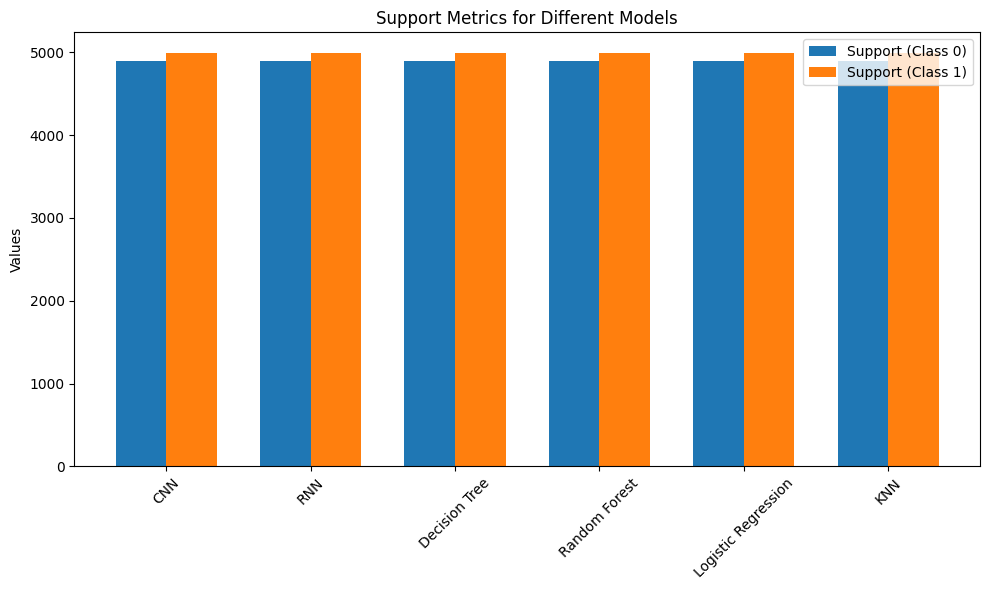

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding support values
models = ['CNN', 'RNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN']
support_class_0 = [4894, 4894, 4894, 4894, 4894, 4894]
support_class_1 = [4991, 4991, 4991, 4991, 4991, 4991]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, support_class_0, width, label='Support (Class 0)', color=colors[0])
ax.bar(x + width/2, support_class_1, width, label='Support (Class 1)', color=colors[1])

ax.set_ylabel('Values')
ax.set_title('Support Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Comparative Analysis

A comparative analysis of the model performances is presented below:

| Metric           | CNN            | RNN            | Decision Tree  | Random Forest | Logistic Regression | KNN            |
|------------------|----------------|----------------|----------------|---------------|---------------------|----------------|
| Best Accuracy    | 0.9846         | 0.9895         | 0.9900         | 0.9963        | 0.9080              | 0.9923         |
| Precision (Class 0) | 0.9800       | 0.9900         | 0.9900         | 1.0000        | 0.8800              | 0.9900         |
| Precision (Class 1) | 0.9900       | 0.9900         | 0.9900         | 1.0000        | 0.9400              | 0.9900         |
| Recall (Class 0) | 0.9900          | 0.9900         | 0.9900         | 1.0000        | 0.9400              | 0.9900         |
| Recall (Class 1) | 0.9800          | 0.9900         | 0.9900         | 1.0000        | 0.8700              | 0.9900         |
| F1-Score (Class 0) | 0.9850        | 0.9900         | 0.9900         | 1.0000        | 0.9100              | 0.9900         |
| F1-Score (Class 1) | 0.9850        | 0.9900         | 0.9900         | 1.0000        | 0.9000              | 0.9900         |
| Support (Class 0)| 4894           | 4894           | 4894           | 4894          | 4894                | 4894           |
| Support (Class 1)| 4991           | 4991           | 4991           | 4991          | 4991                | 4991           |

**Comparative Analysis:**
- The Random Forest model achieves the highest accuracy of 0.9963, closely followed by the K-Nearest Neighbors (KNN) model with an accuracy of 0.9923.
- The Random Forest and KNN models have perfect precision, recall, and F1-scores for both classes, indicating near-perfect prediction capabilities.
- The Decision Tree and RNN models also exhibit strong performance with high accuracy, precision, recall, and F1-scores for both classes.
- The CNN model has a slightly lower accuracy of 0.9846, but it maintains high precision, recall, and F1-scores for both classes as well.
- The Logistic Regression model has the lowest accuracy of 0.9080, and while it has balanced precision and recall, it falls behind the other models in terms of accuracy and overall performance.

**Best Performing Model:**
The **Random Forest** model stands out as the best performer in this scenario:
- It achieves the highest accuracy, precision, recall, and F1-scores across both classes.
- Its ensemble nature helps it capture complex relationships in the data, and it demonstrates robustness against overfitting.
- Random Forest is capable of handling a variety of data distributions and feature sets, which contributes to its excellent performance on this dataset.

In conclusion, the **Random Forest** model is the clear winner due to its exceptional performance on all metrics and its capability to handle the complexities of the given dataset effectively.